In [1]:
# The dataset information is mentioned in Readme file.
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

In [2]:
# loading dataset in data variable
data = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
data.head()

YearStart  YearEnd LocationAbbr LocationDesc  \
0       2011     2011           AL      Alabama   
1       2011     2011           AL      Alabama   
2       2011     2011           AL      Alabama   
3       2011     2011           AL      Alabama   
4       2011     2011           AL      Alabama   

                                   Datasource                    Class  \
0  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
1  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
2  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
3  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
4  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   

                     Topic                                           Question  \
0  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
1  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
2  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
3  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   
4  Obesity / Weight Status  Percent of adults aged 18 years and older who ...   

   Data_Value_Unit Data_Value_Type  ...  \
0              NaN           Value  ...   
1              NaN           Value  ...   
2              NaN           Value  ...   
3              NaN           Value  ...   
4              NaN           Value  ...   

                               GeoLocation  ClassID TopicID QuestionID  \
0  (32.84057112200048, -86.63186076199969)      OWS    OWS1       Q036   
1  (32.84057112200048, -86.63186076199969)      OWS    OWS1       Q036   
2  (32.84057112200048, -86.63186076199969)      OWS    OWS1       Q036   
3  (32.84057112200048, -86.63186076199969)      OWS    OWS1       Q036   
4  (32.84057112200048, -86.63186076199969)      OWS    OWS1       Q036   

   DataValueTypeID  LocationID  StratificationCategory1  \
0            VALUE           1                    Total   
1            VALUE           1                   Gender   
2            VALUE           1                   Gender   
3            VALUE           1                Education   
4            VALUE           1                Education   

         Stratification1 StratificationCategoryId1 StratificationID1  
0                  Total                       OVR           OVERALL  
1                   Male                       GEN              MALE  
2                 Female                       GEN            FEMALE  
3  Less than high school                       EDU             EDUHS  
4   High school graduate                       EDU         EDUHSGRAD  

[5 rows x 33 columns]

In [3]:
# The dataset has 33 columns and 53392 rows
data.shape

(53392, 33)

In [4]:
# Percentage of missing values in each attrubute
data.isnull().sum() * 100 / len(data)

YearStart                       0.000000
YearEnd                         0.000000
LocationAbbr                    0.000000
LocationDesc                    0.000000
Datasource                      0.000000
Class                           0.000000
Topic                           0.000000
Question                        0.000000
Data_Value_Unit               100.000000
Data_Value_Type                 0.000000
Data_Value                      9.450854
Data_Value_Alt                  9.450854
Data_Value_Footnote_Symbol     90.549146
Data_Value_Footnote            90.549146
Low_Confidence_Limit            9.450854
High_Confidence_Limit           9.450854
Sample_Size                     9.450854
Total                          96.428304
Age(years)                     78.577315
Education                      85.713215
Gender                         92.856608
Income                         74.998127
Race/Ethnicity                 71.426431
GeoLocation                     1.887923
ClassID         

In [5]:
# As we can see that many features have 70% to 100% of missing values so we drop those features to reduce noise and to make dataset simple.
# Also some features were duplicate so we decide to drop them too.
# Some of the features are not dropped even though having large number of missing values in order to check their correlation with data value
dropcols = ['LocationAbbr','Datasource','Data_Value_Unit','Data_Value_Type','Data_Value_Footnote_Symbol',
'Total','Data_Value_Footnote','TopicID','QuestionID','DataValueTypeID','LocationID']

In [6]:
data.drop(columns=dropcols, inplace=True)

In [7]:
# After dropping features we have now 22 features left
data.shape

(53392, 22)

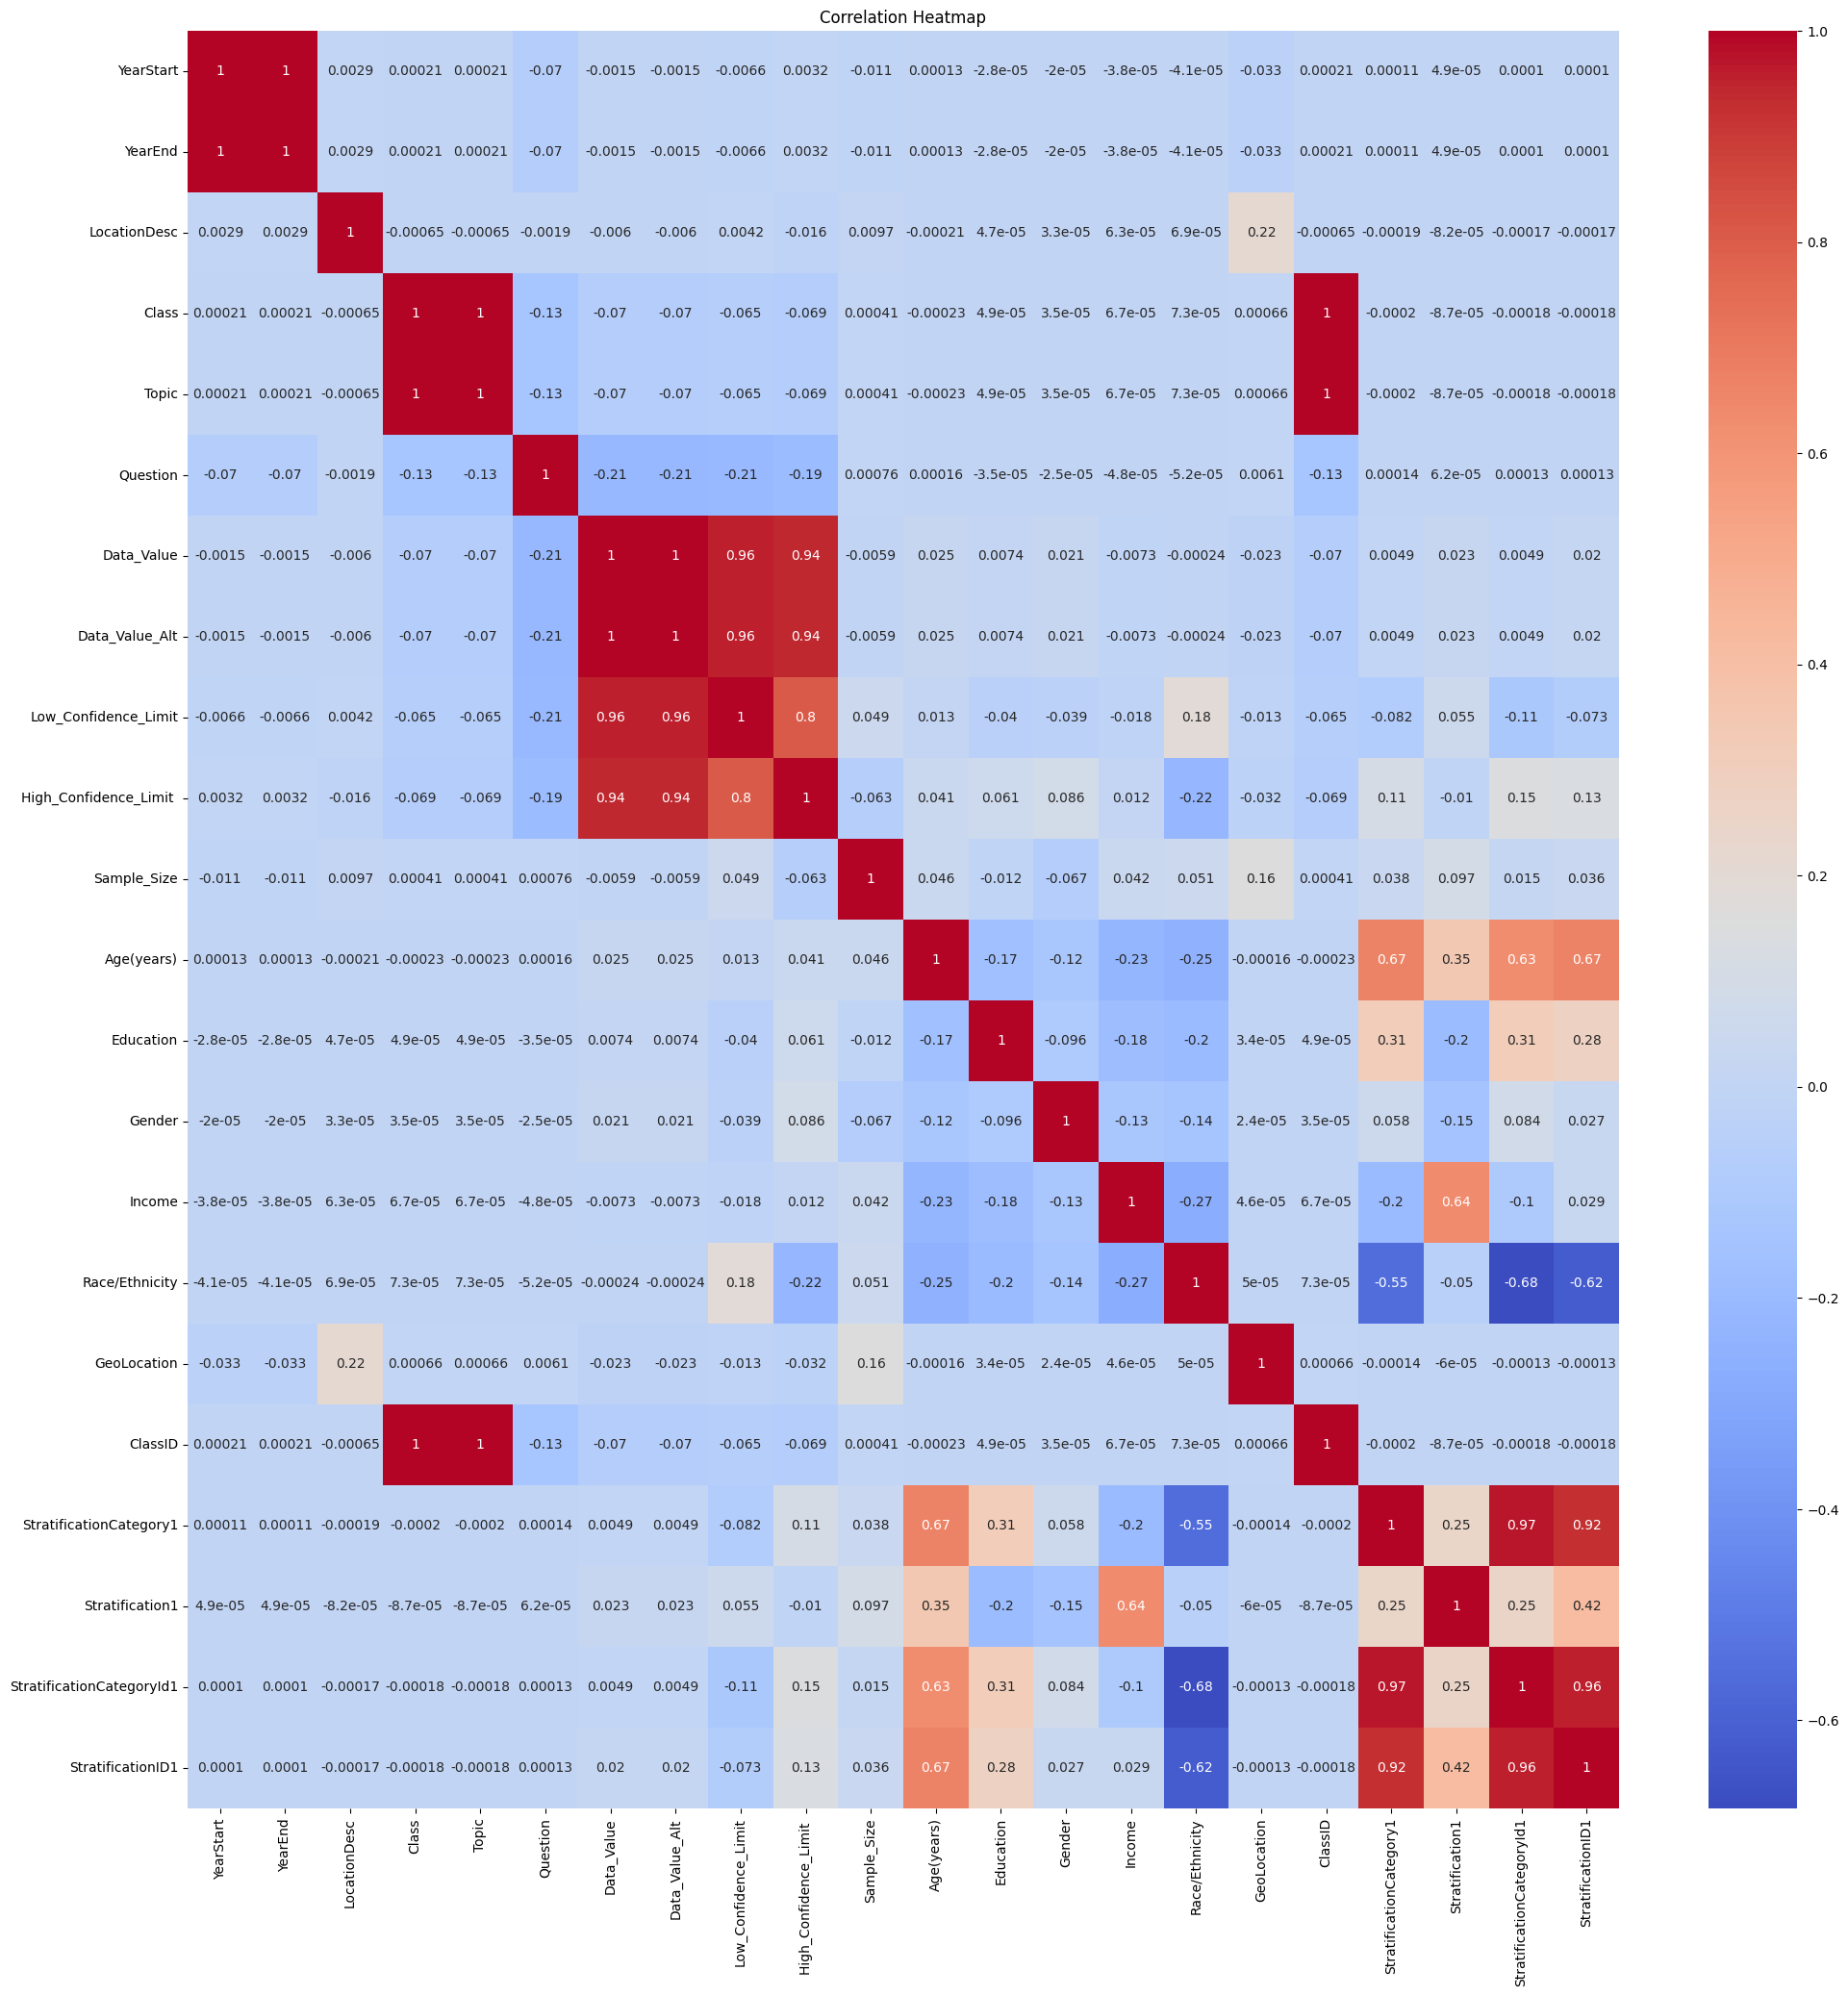

In [8]:
# making a shallow copy of "data" into "data_check" to find correlation between each remaining feature.
data_check = data.copy()
object_values = data_check.select_dtypes(include=['object'])
label_encoder = LabelEncoder()
for column in object_values:
    data_check[column] = label_encoder.fit_transform(data_check[column])
data_check_cor = data_check.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(data_check_cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
data_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  53392 non-null  int64  
 1   YearEnd                    53392 non-null  int64  
 2   LocationDesc               53392 non-null  int32  
 3   Class                      53392 non-null  int32  
 4   Topic                      53392 non-null  int32  
 5   Question                   53392 non-null  int32  
 6   Data_Value                 48346 non-null  float64
 7   Data_Value_Alt             48346 non-null  float64
 8   Low_Confidence_Limit       48346 non-null  float64
 9   High_Confidence_Limit      48346 non-null  float64
 10  Sample_Size                48346 non-null  float64
 11  Age(years)                 53392 non-null  int32  
 12  Education                  53392 non-null  int32  
 13  Gender                     53392 non-null  int

In [10]:
# From the above heatmap we can see many of the features are not having a high or good value of linear correlation, there we choose to drop those.
colsdrop = ['YearEnd','Sample_Size','Data_Value','GeoLocation','ClassID','Stratification1','Topic','StratificationCategory1',
           'StratificationCategoryId1','StratificationID1']
data.drop(columns=colsdrop, inplace=True)
data.shape

(53392, 12)

In [11]:
# In income feature we are removing "Data not reported" because if the data is not recorded it won't help us in anyway and will make an extra column when 
# we will do one hot encoding also it may create noise. That's why we choose to drop it.
data = data[data['Income'] != 'Data not reported']

In [12]:
# As we saw in "cell number 4" that we had many missing values of the following features also but according to stratification feature, every value is found
# to be present. For example in stratification if the instance "Gender" is present we will have a corresponding value of Gender present in Gender feature 
# These all features are categorical.
# So in order to check the effect of all these columns we are applying one hot encoding which will mark "1" and "0" if data is present or not respectively.
data = pd.get_dummies(data, columns=['Age(years)', 'Education','Gender','Income','Race/Ethnicity'],
                            prefix=['Age(years)', 'Education','Gender','Income','Race/Ethnicity'])

In [13]:
# Printing name of available features
col_names = data.columns.tolist()
print(col_names)

['YearStart', 'LocationDesc', 'Class', 'Question', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Age(years)_18 - 24', 'Age(years)_25 - 34', 'Age(years)_35 - 44', 'Age(years)_45 - 54', 'Age(years)_55 - 64', 'Age(years)_65 or older', 'Education_College graduate', 'Education_High school graduate', 'Education_Less than high school', 'Education_Some college or technical school', 'Gender_Female', 'Gender_Male', 'Income_$15,000 - $24,999', 'Income_$25,000 - $34,999', 'Income_$35,000 - $49,999', 'Income_$50,000 - $74,999', 'Income_$75,000 or greater', 'Income_Less than $15,000', 'Race/Ethnicity_2 or more races', 'Race/Ethnicity_American Indian/Alaska Native', 'Race/Ethnicity_Asian', 'Race/Ethnicity_Hawaiian/Pacific Islander', 'Race/Ethnicity_Hispanic', 'Race/Ethnicity_Non-Hispanic Black', 'Race/Ethnicity_Non-Hispanic White', 'Race/Ethnicity_Other']


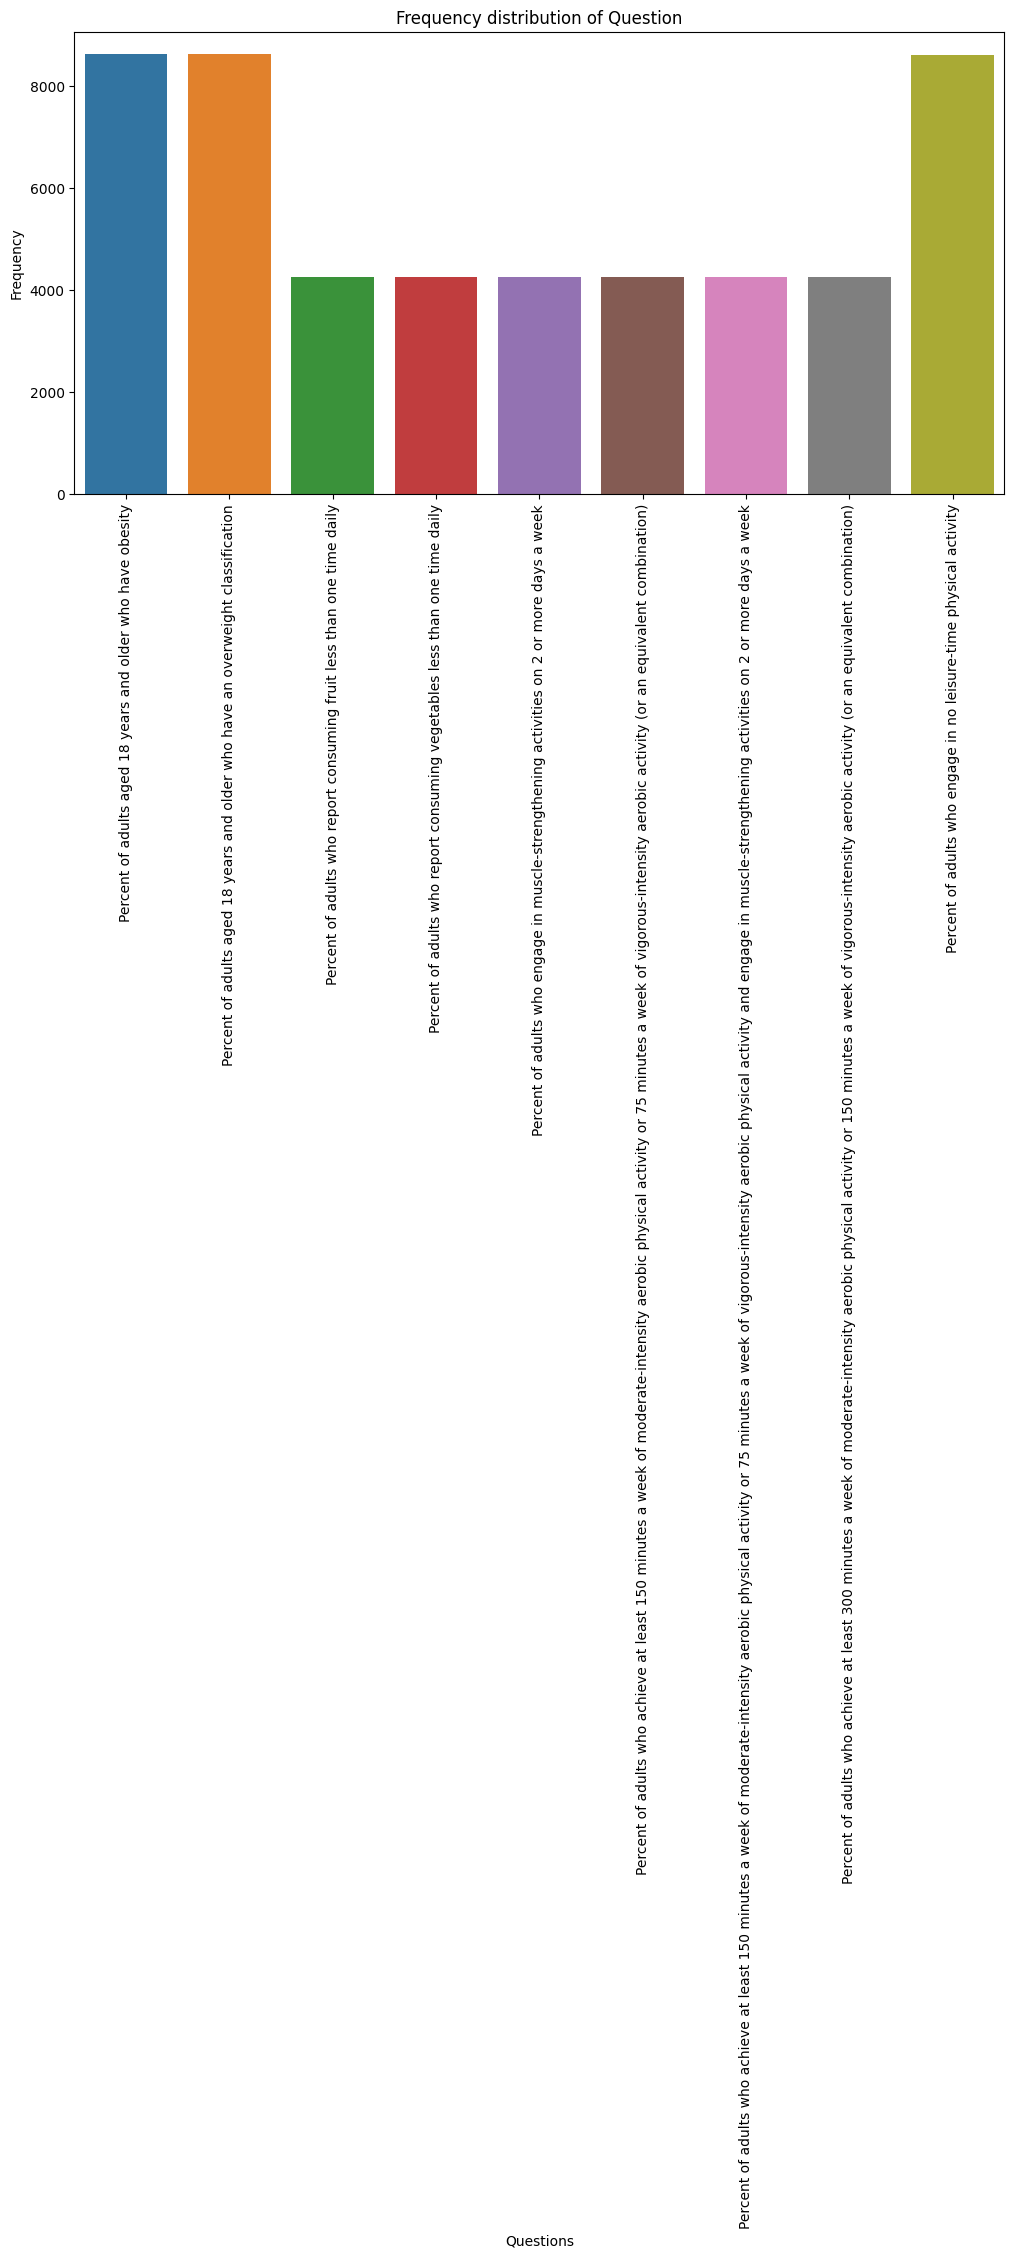

In [14]:
# Plotting count plot for Questions to check frequency of a particular question asked.
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Question')
plt.xticks(rotation=90)
plt.title('Frequency distribution of Question')
plt.xlabel('Questions')
plt.ylabel('Frequency')
plt.show()

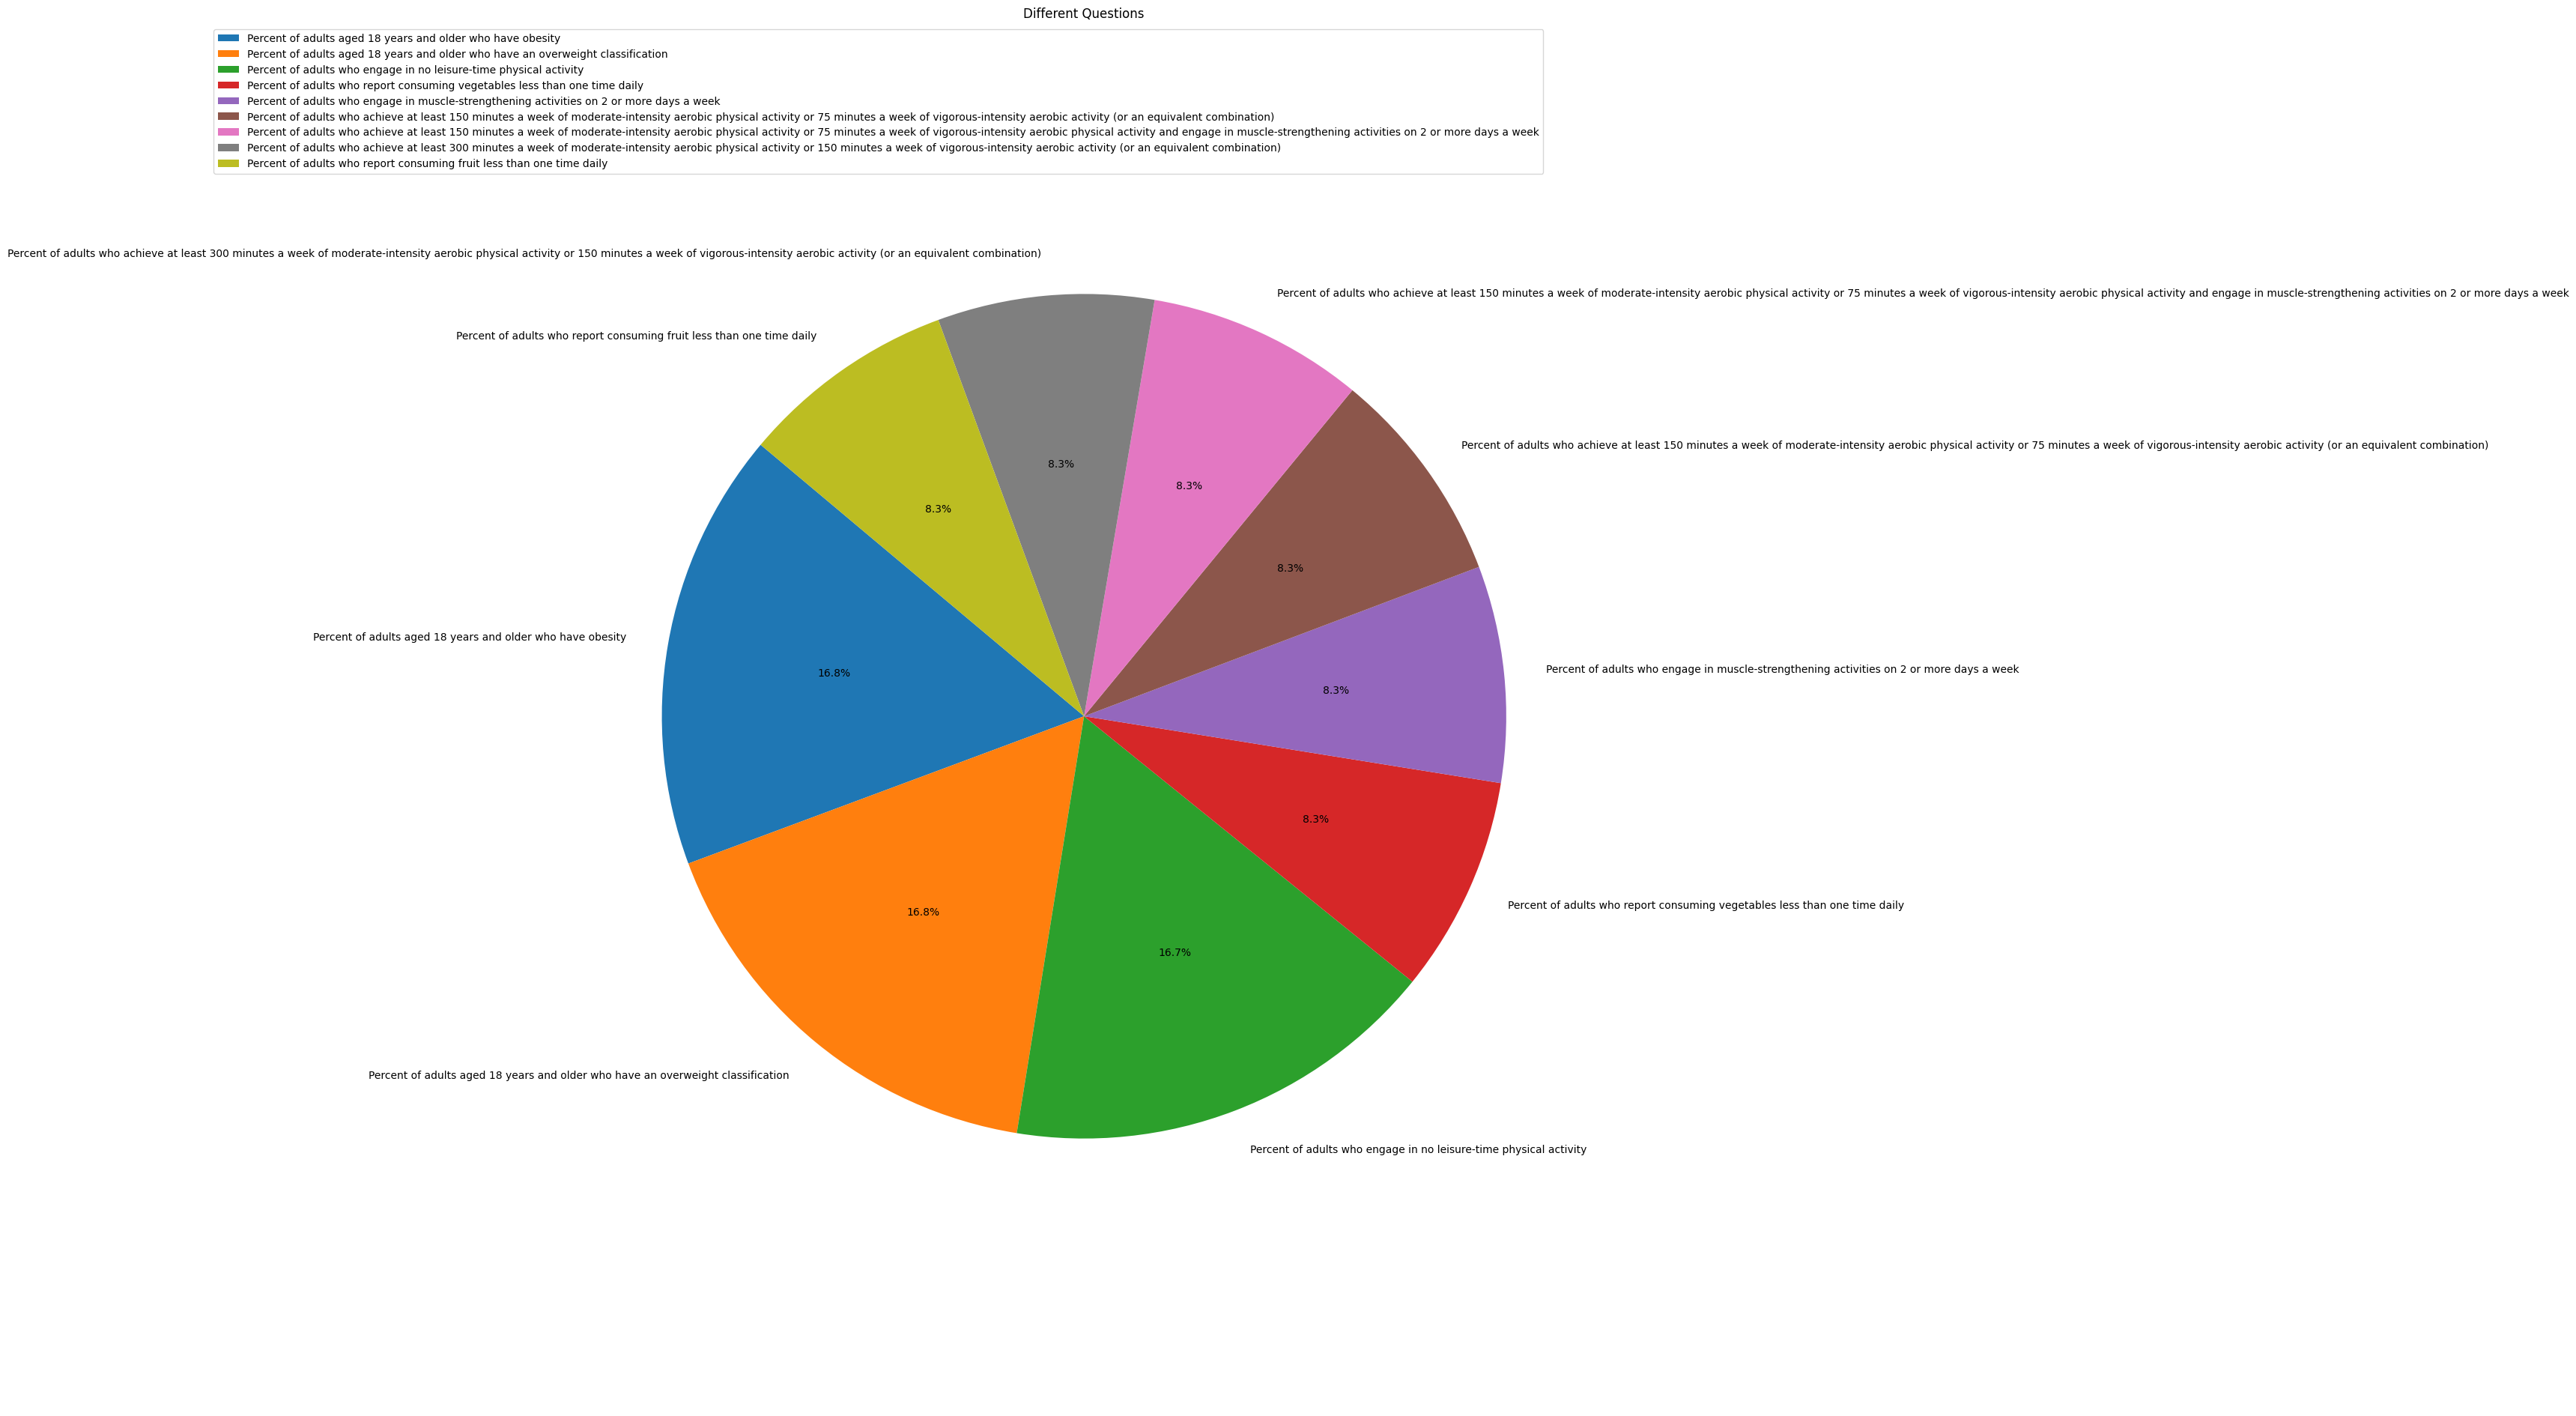

In [15]:
# Plotting pie plot for Questions to check percentage of a particular question asked.
question_num = data['Question'].value_counts()
plt.figure(figsize=(16, 24))
plt.pie(question_num, labels=question_num.index, autopct='%1.1f%%', startangle=140)
plt.title("Different Questions")
plt.axis('equal')
plt.legend(question_num.index)
plt.show()

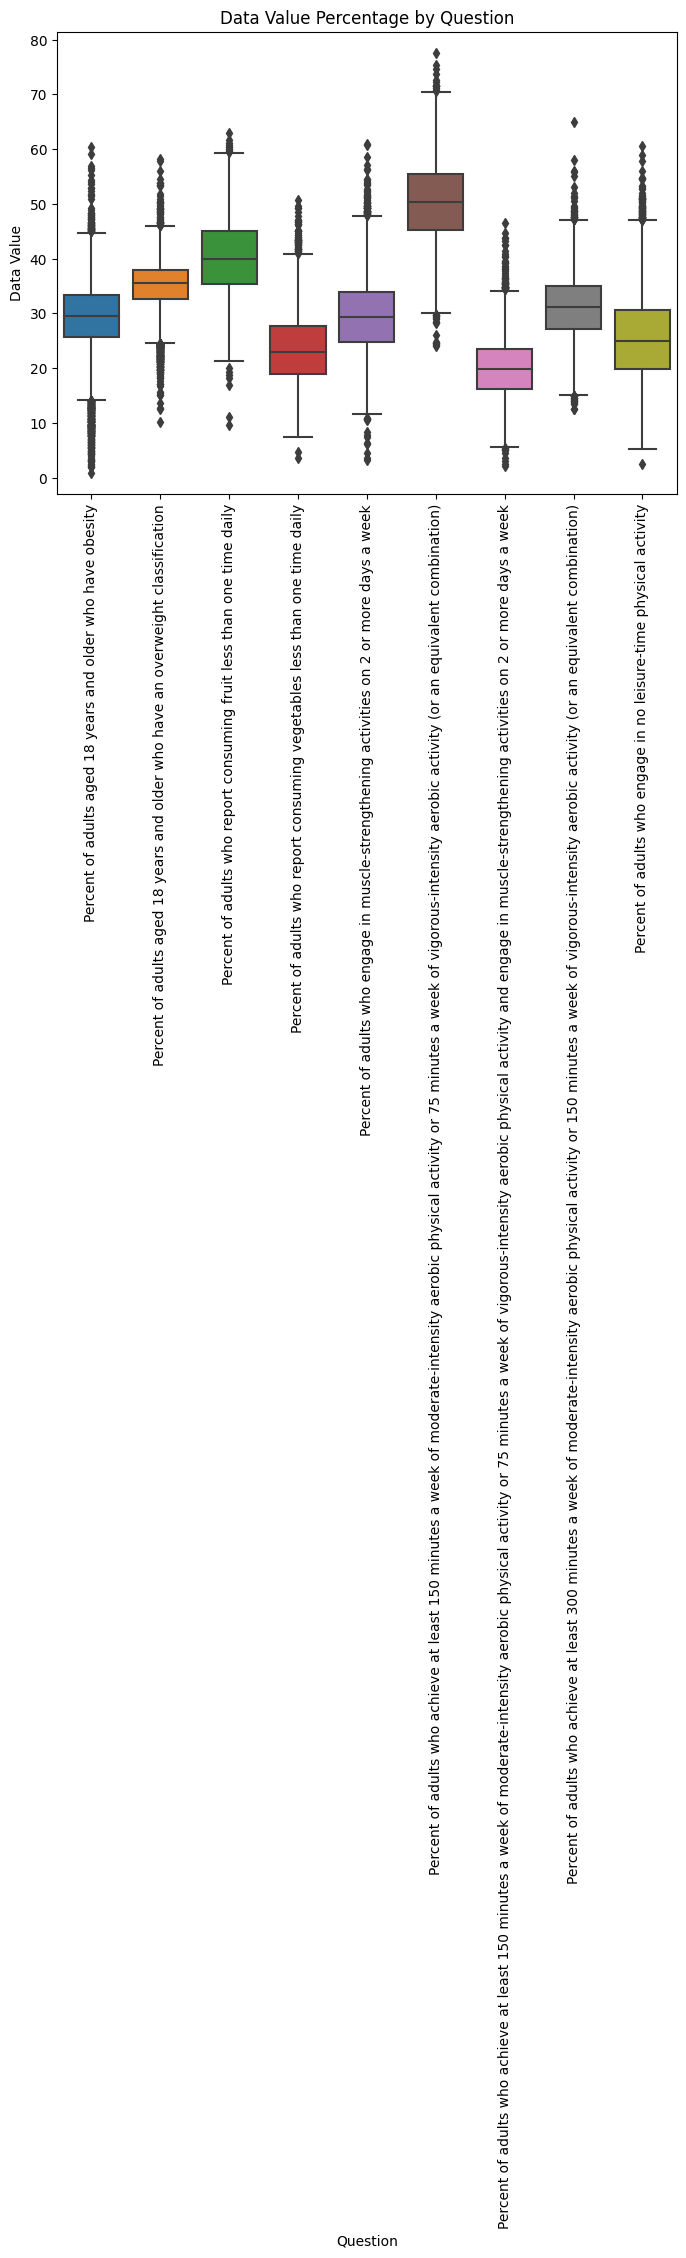

In [16]:
# Plotting box plot of Data Value with respect to question 
# We can observe that most of the data value range (50%) lie in a certain region for a given question and for higher values it considers it as outlier
# for a given question
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Question', y='Data_Value_Alt')
plt.xticks(rotation=90)
plt.title('Data Value Percentage by Question')
plt.xlabel('Question')
plt.ylabel('Data Value')
plt.show()

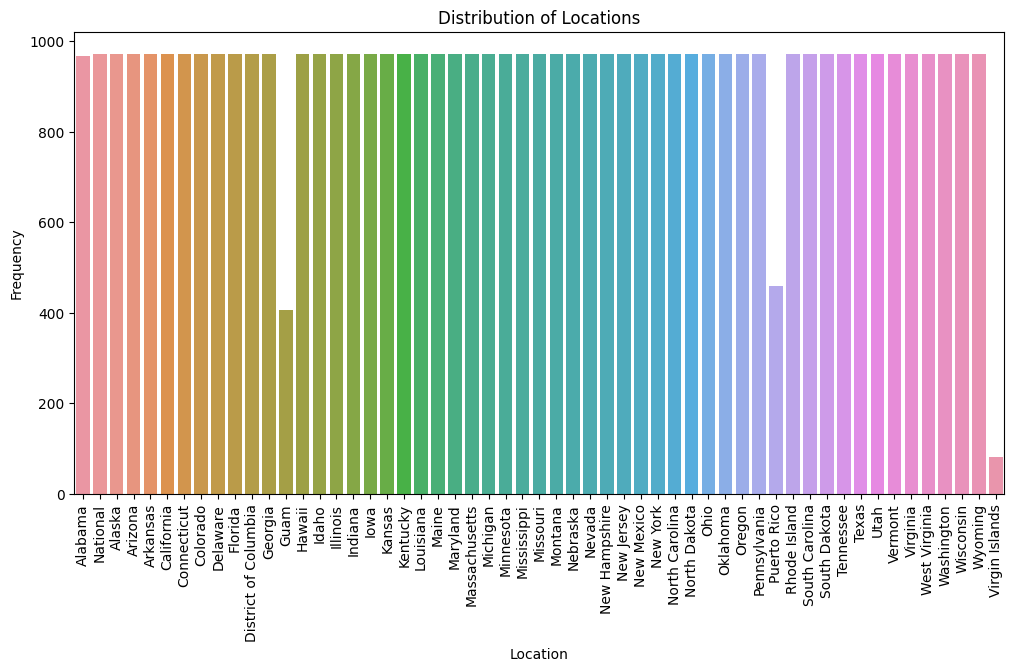

In [17]:
# Plotting count plot to check frequency distribution of Location
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='LocationDesc')
plt.xticks(rotation=90)
plt.title('Distribution of Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

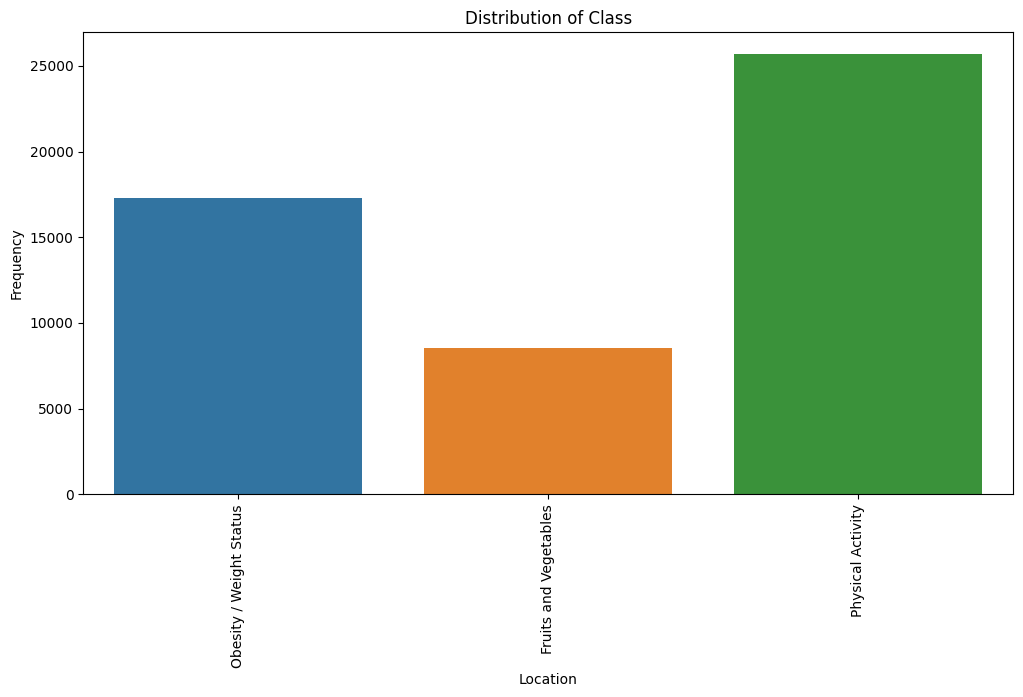

In [18]:
# Frequency distribution of class
# The class which occurs the most is Physical Activity class
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Class')
plt.xticks(rotation=90)
plt.title('Distribution of Class')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

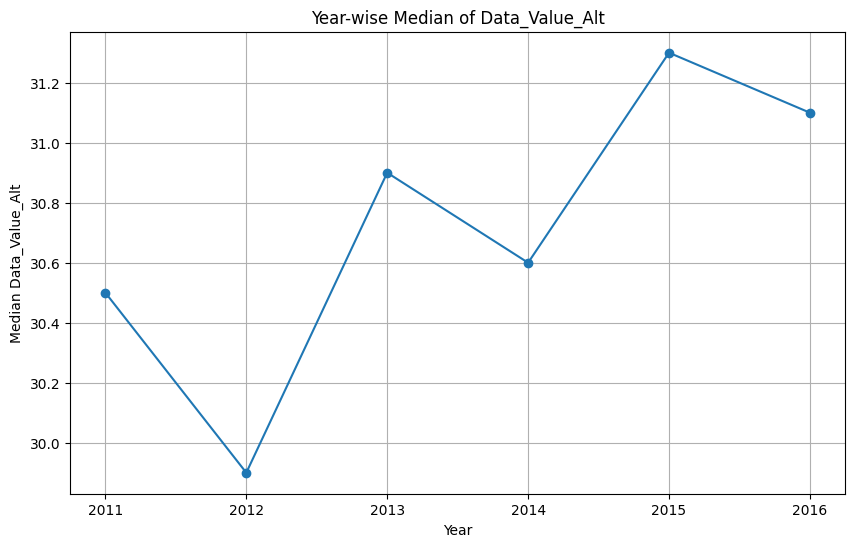

In [19]:
# Year wise aggregate median value data value, irrespective of class, question all are included. We can see the trend of data value {the surety} is varying 
# largely over the years. Depending on some factors.
yearwise_median = data.groupby('YearStart')['Data_Value_Alt'].median().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(yearwise_median['YearStart'], yearwise_median['Data_Value_Alt'], marker='o', linestyle='-')
plt.title('Year-wise Median of Data_Value_Alt')
plt.xlabel('Year')
plt.ylabel('Median Data_Value_Alt')
plt.grid(True)
plt.show()

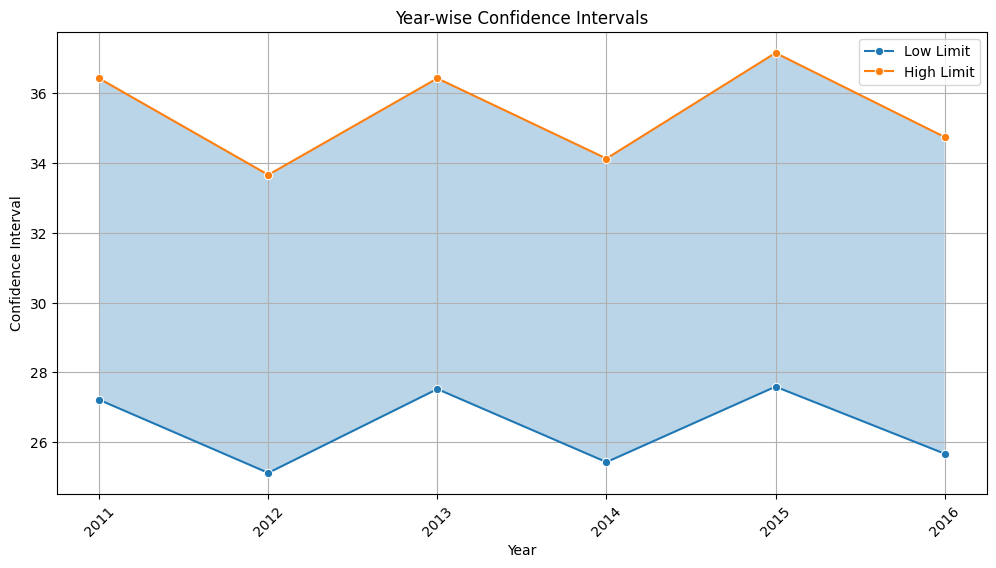

In [20]:
# Year wise confidence interval. We can observe that the interval changes over the years
confidence_intervals = data.groupby('YearStart')[['Low_Confidence_Limit','High_Confidence_Limit ']].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=confidence_intervals, x='YearStart', y='Low_Confidence_Limit', marker='o', label='Low Limit')
sns.lineplot(data=confidence_intervals, x='YearStart', y='High_Confidence_Limit ', marker='o', label='High Limit')
plt.fill_between(confidence_intervals['YearStart'], confidence_intervals['Low_Confidence_Limit'], confidence_intervals['High_Confidence_Limit '], alpha=0.3)
plt.title('Year-wise Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('Confidence Interval')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

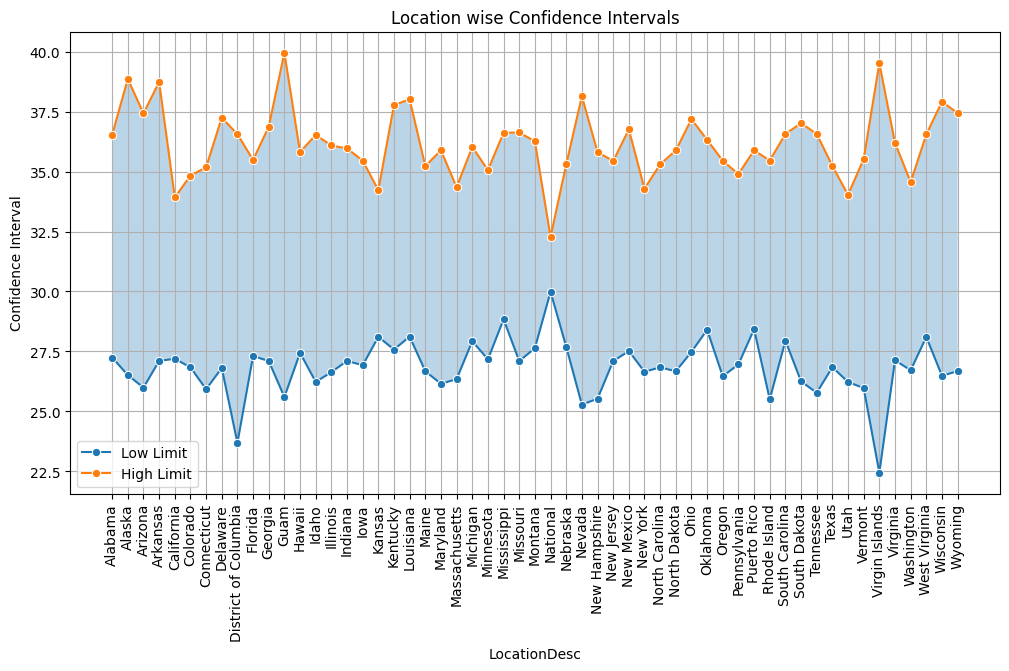

In [21]:
# Location wise confidence interval. We can observe that the interval changes for different locations. Depending upon factors like,
# questions and class frequency and sample size.
confidence_intervals = data.groupby('LocationDesc')[['Low_Confidence_Limit','High_Confidence_Limit ']].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=confidence_intervals, x='LocationDesc', y='Low_Confidence_Limit', marker='o', label='Low Limit')
sns.lineplot(data=confidence_intervals, x='LocationDesc', y='High_Confidence_Limit ', marker='o', label='High Limit')
plt.fill_between(confidence_intervals['LocationDesc'], confidence_intervals['Low_Confidence_Limit'], confidence_intervals['High_Confidence_Limit '], alpha=0.3)
plt.title('Location wise Confidence Intervals')
plt.xlabel('LocationDesc')
plt.ylabel('Confidence Interval')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

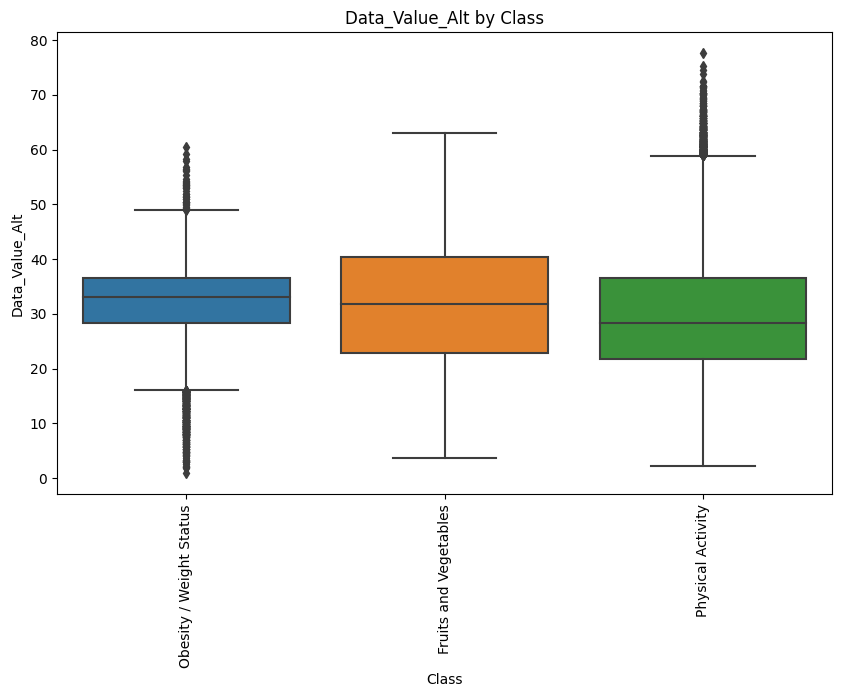

In [22]:
# Box plot between Data value and class. We can observe that all the data values for class Fruits and Vegetables are normally distributed and in 
# certain range such that it has no outliers w.r.t class for other two classes there are outliers present according to this box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Class', y='Data_Value_Alt')
plt.title('Data_Value_Alt by Class')
plt.xlabel('Class')
plt.ylabel('Data_Value_Alt')
plt.xticks(rotation=90)
plt.show()

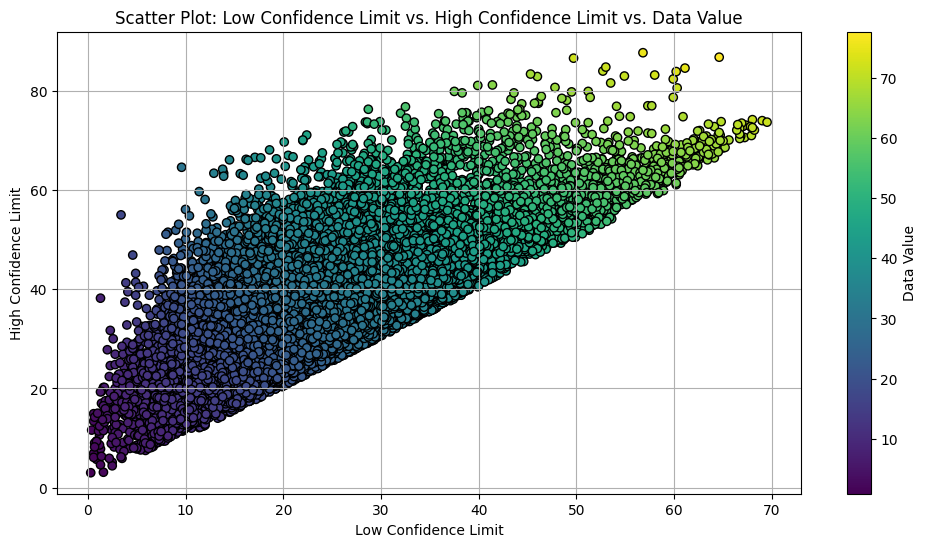

In [23]:
# From this scatter plot we can observe that when the confidence interval is increased the data value is increased and vice versa.
plt.figure(figsize=(12, 6))
plt.scatter(data['Low_Confidence_Limit'], data['High_Confidence_Limit '] , c=data['Data_Value_Alt'], cmap='viridis', marker='o', edgecolors='black')
plt.colorbar(label='Data Value')  
plt.xlabel('Low Confidence Limit')
plt.ylabel('High Confidence Limit')
plt.title('Scatter Plot: Low Confidence Limit vs. High Confidence Limit vs. Data Value')
plt.grid(True)
plt.show()

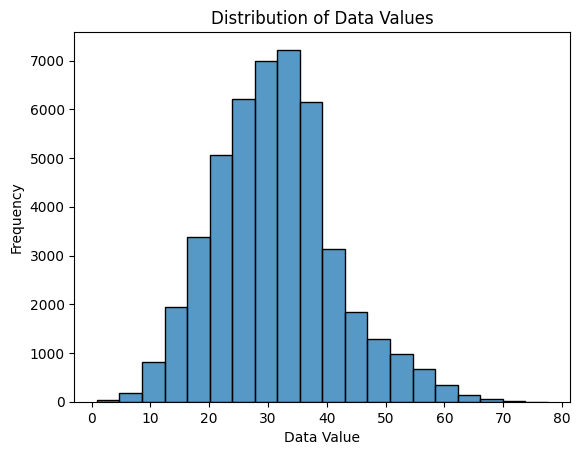

In [24]:
# Frequency distribution of data values
sns.histplot(data['Data_Value_Alt'], bins=20)
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.title('Distribution of Data Values')
plt.show()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51485 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   YearStart                                     51485 non-null  int64  
 1   LocationDesc                                  51485 non-null  object 
 2   Class                                         51485 non-null  object 
 3   Question                                      51485 non-null  object 
 4   Data_Value_Alt                                46439 non-null  float64
 5   Low_Confidence_Limit                          46439 non-null  float64
 6   High_Confidence_Limit                         46439 non-null  float64
 7   Age(years)_18 - 24                            51485 non-null  bool   
 8   Age(years)_25 - 34                            51485 non-null  bool   
 9   Age(years)_35 - 44                            51485 non-null  bool

In [26]:
# Selecting all numeric data for data pre-processing
numeric_data = data.select_dtypes(include=['int64', 'float64'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51485 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   YearStart                                     51485 non-null  int64  
 1   LocationDesc                                  51485 non-null  object 
 2   Class                                         51485 non-null  object 
 3   Question                                      51485 non-null  object 
 4   Data_Value_Alt                                46439 non-null  float64
 5   Low_Confidence_Limit                          46439 non-null  float64
 6   High_Confidence_Limit                         46439 non-null  float64
 7   Age(years)_18 - 24                            51485 non-null  bool   
 8   Age(years)_25 - 34                            51485 non-null  bool   
 9   Age(years)_35 - 44                            51485 non-null  bool

In [27]:
# Extracting columns for encoding
object_vals = data.select_dtypes(include=['object'])
bool_vals = data.select_dtypes(include=['bool'])

In [28]:
for column in object_vals:
    data[column] = label_encoder.fit_transform(data[column])

In [29]:
for column in bool_vals:
    data[column] = label_encoder.fit_transform(data[column])

In [30]:
data.shape

(51485, 33)

In [31]:
# Column slicing for correlation
age_cor = data.iloc[:, :13]
cor_age = age_cor.corr()
cor_ed = data.iloc[:,:17]
cor_ed.drop(columns=['Age(years)_18 - 24','Age(years)_25 - 34','Age(years)_35 - 44','Age(years)_45 - 54','Age(years)_55 - 64','Age(years)_65 or older'], inplace=True)
ed_cor = cor_ed.corr()

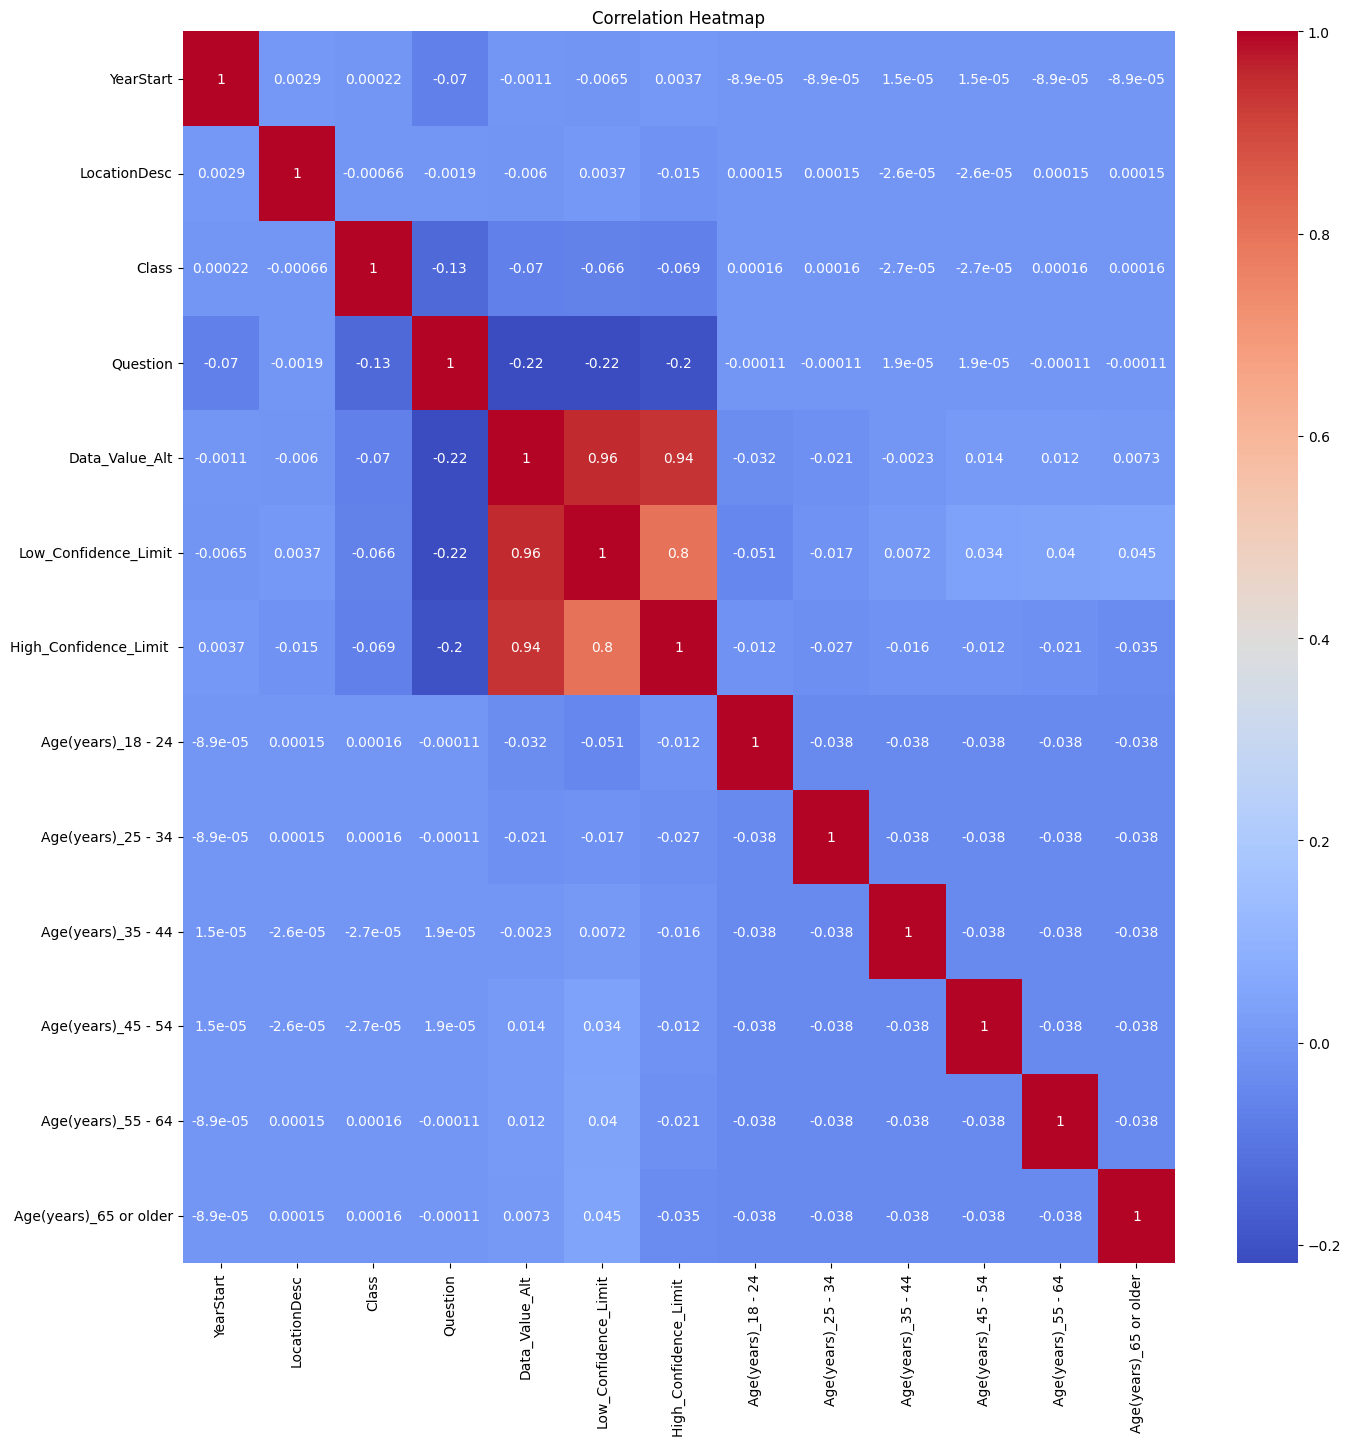

In [32]:
# Correlation heatmap between 'YearStart', 'LocationDesc', 'Class' , 'Question', 'Data_Value_Alt', 
# 'Age(years)_18 - 24','Age(years)_25 - 34','Age(years)_35 - 44','Age(years)_45 - 54','Age(years)_55 - 64','Age(years)_65 or older'
# We can observe that age has no significant correlation with Data_Value_Alt
plt.figure(figsize=(16, 16))
sns.heatmap(cor_age, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

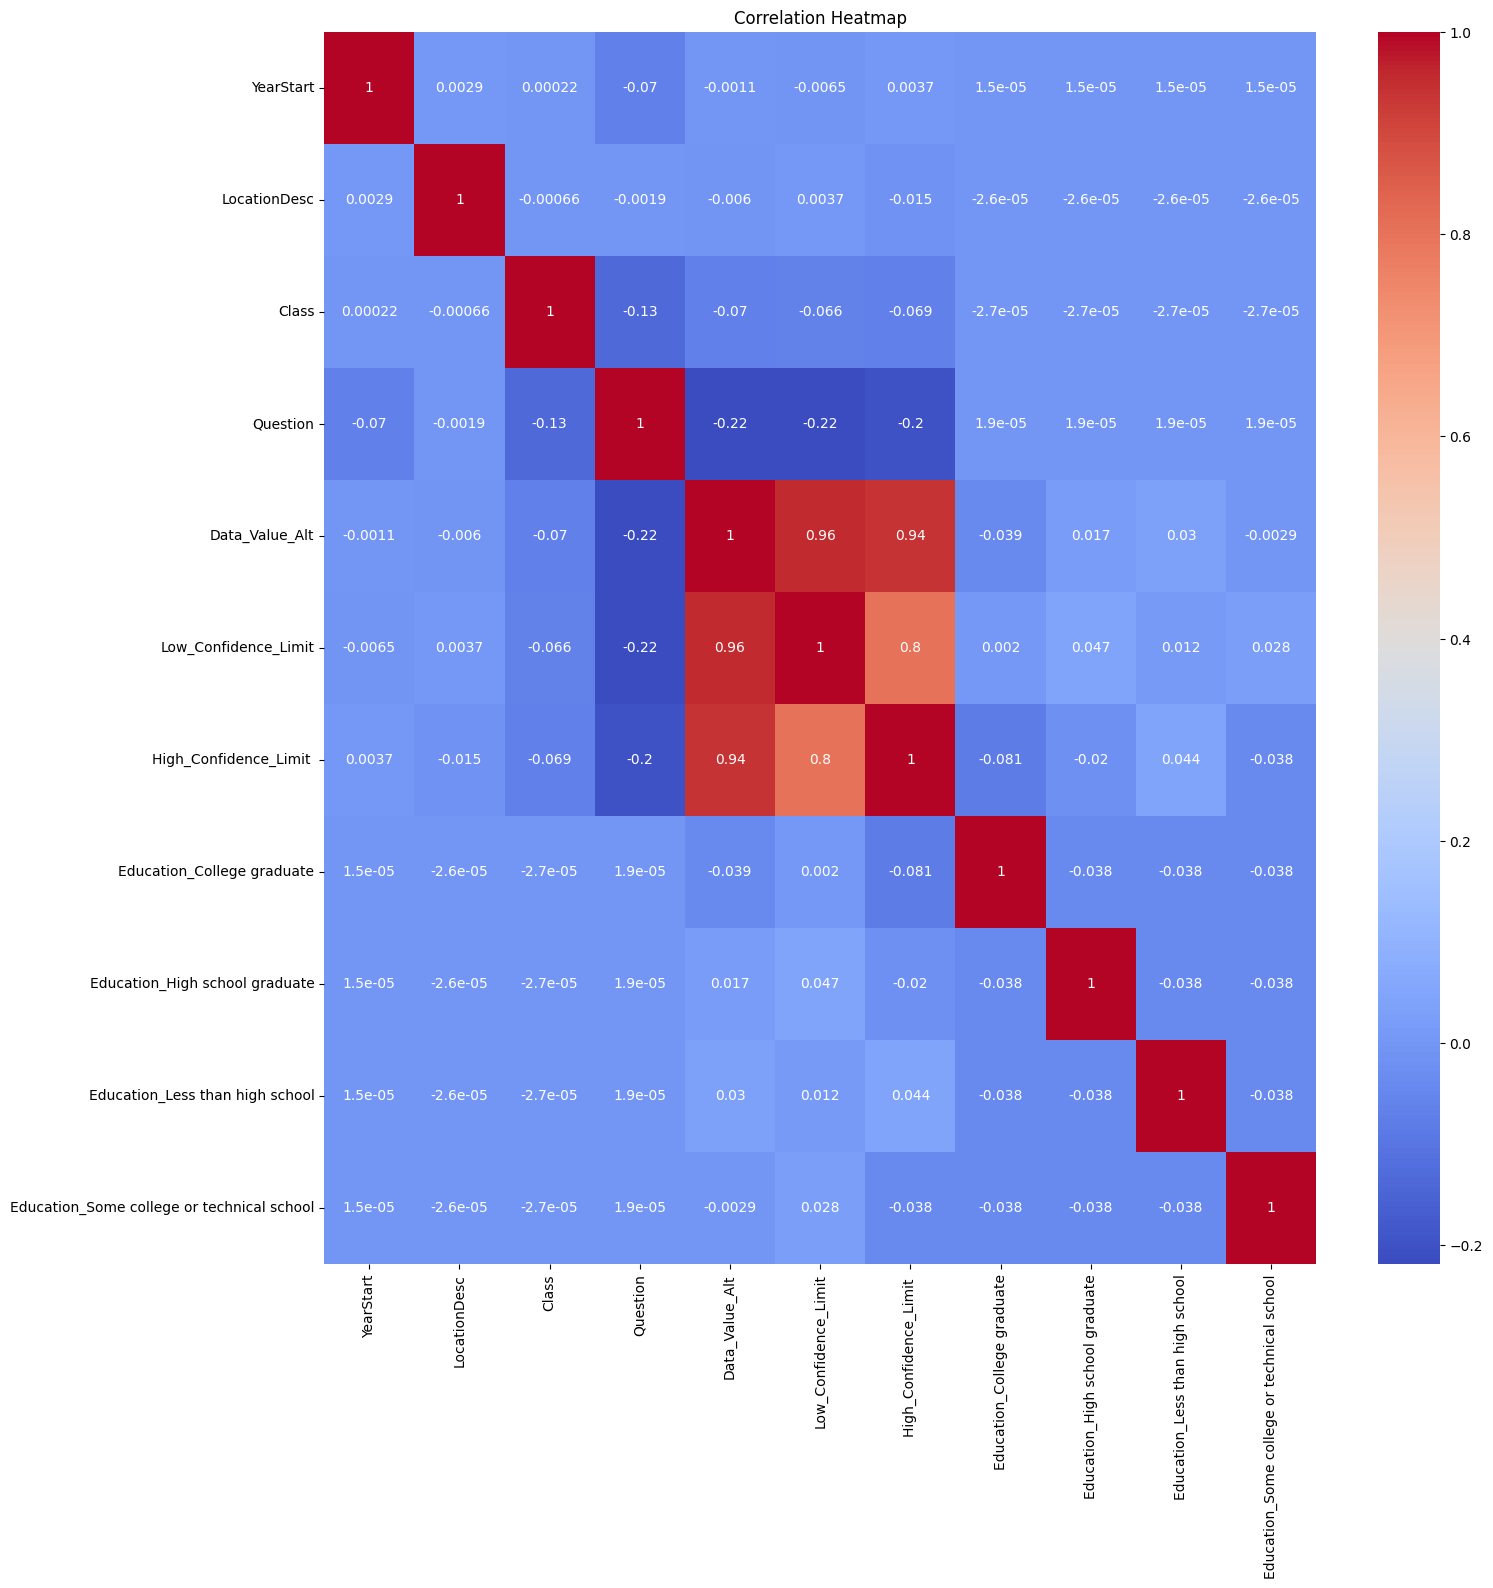

In [33]:
# Correlation heatmap of different values of education and 'YearStart', 'LocationDesc', 'Class' , 'Question', 'Data_Value_Alt'
# We can observe that education has no significant correlation with Data_Value_Alt
plt.figure(figsize=(16, 16))
sns.heatmap(ed_cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

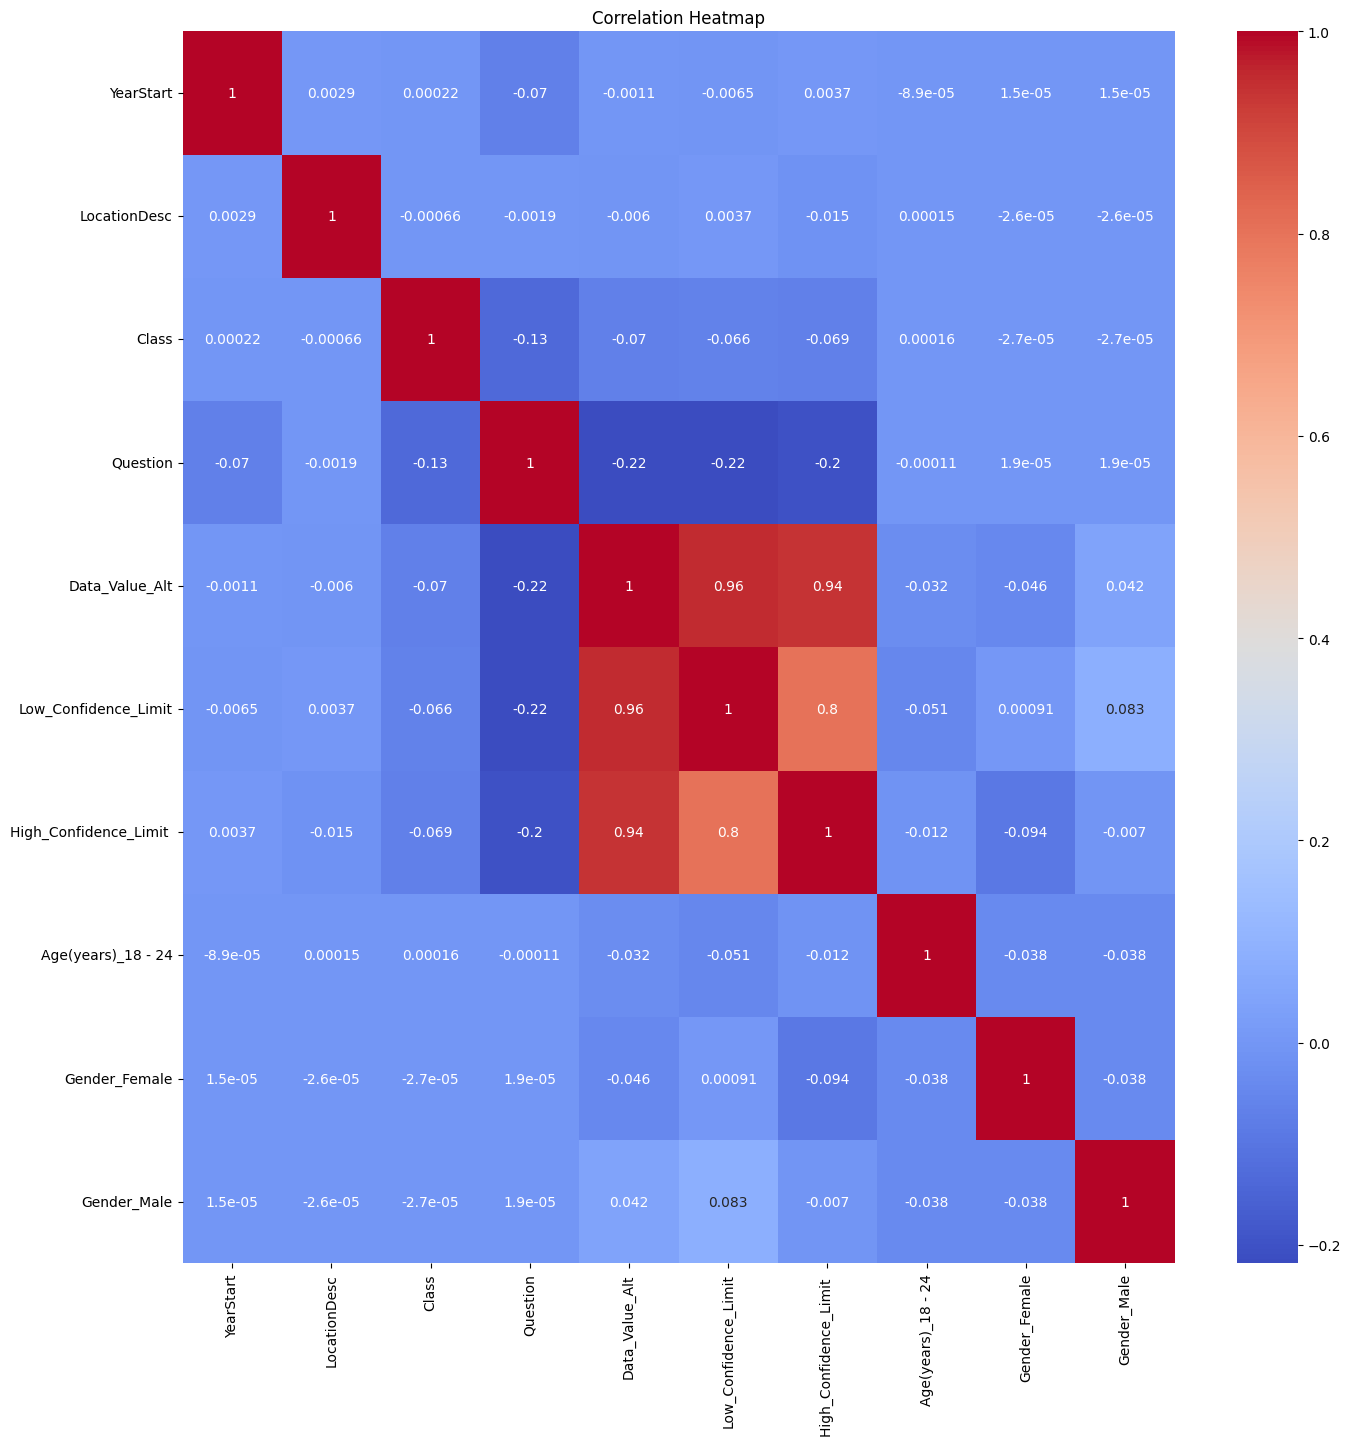

In [34]:
# Correlation heatmap of different values of Gender and 'YearStart', 'LocationDesc', 'Class' , 'Question', 'Data_Value_Alt'
# We can observe that gender has no significant correlation with Data_Value_Alt
main_d = data.iloc[:,:8]
gender_data = data.iloc[:,17:19]
gender_data = pd.concat([main_d, gender_data], axis=1)
gender_cor = gender_data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(gender_cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

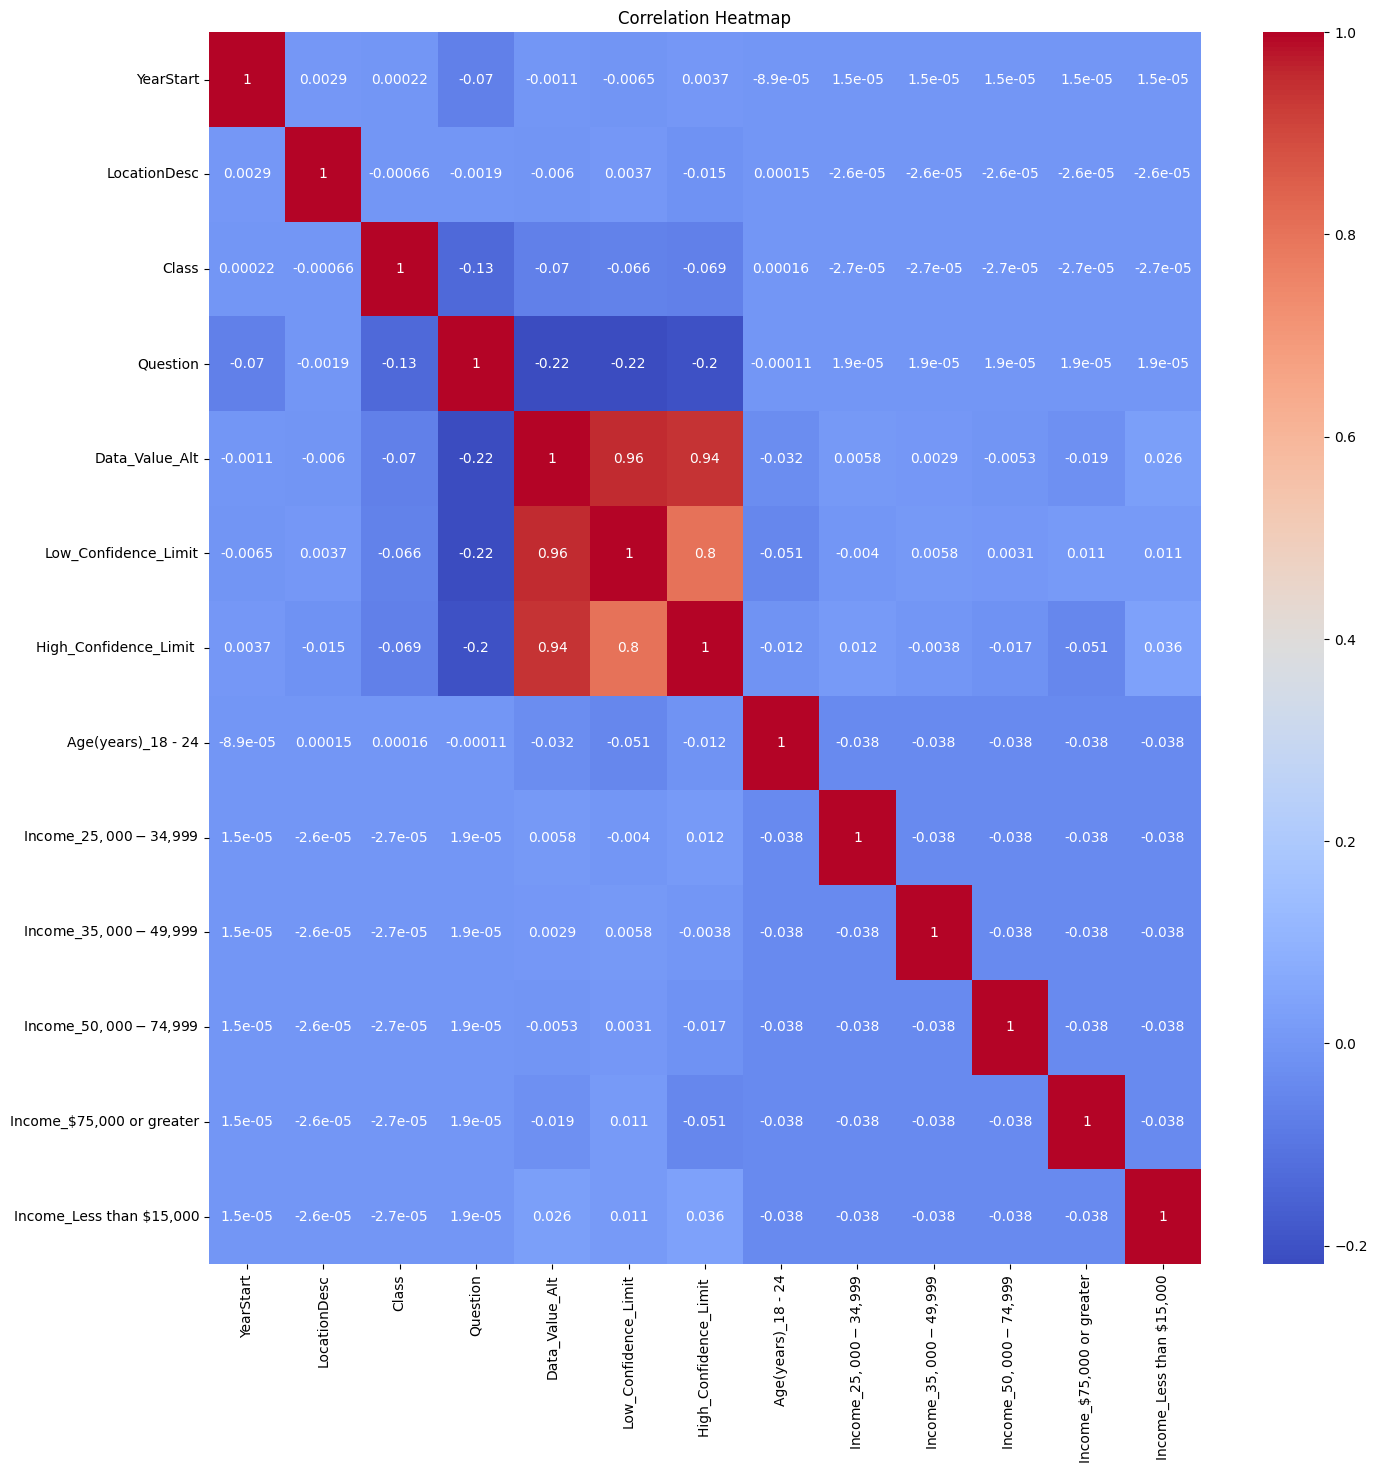

In [35]:
# Correlation heatmap of different values of income and 'YearStart', 'LocationDesc', 'Class' , 'Question', 'Data_Value_Alt'
# We can observe that income has no significant correlation with Data_Value_Alt
income_data = data.iloc[:,20:25]
income_data = pd.concat([main_d, income_data], axis=1)
income_data = income_data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(income_data, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

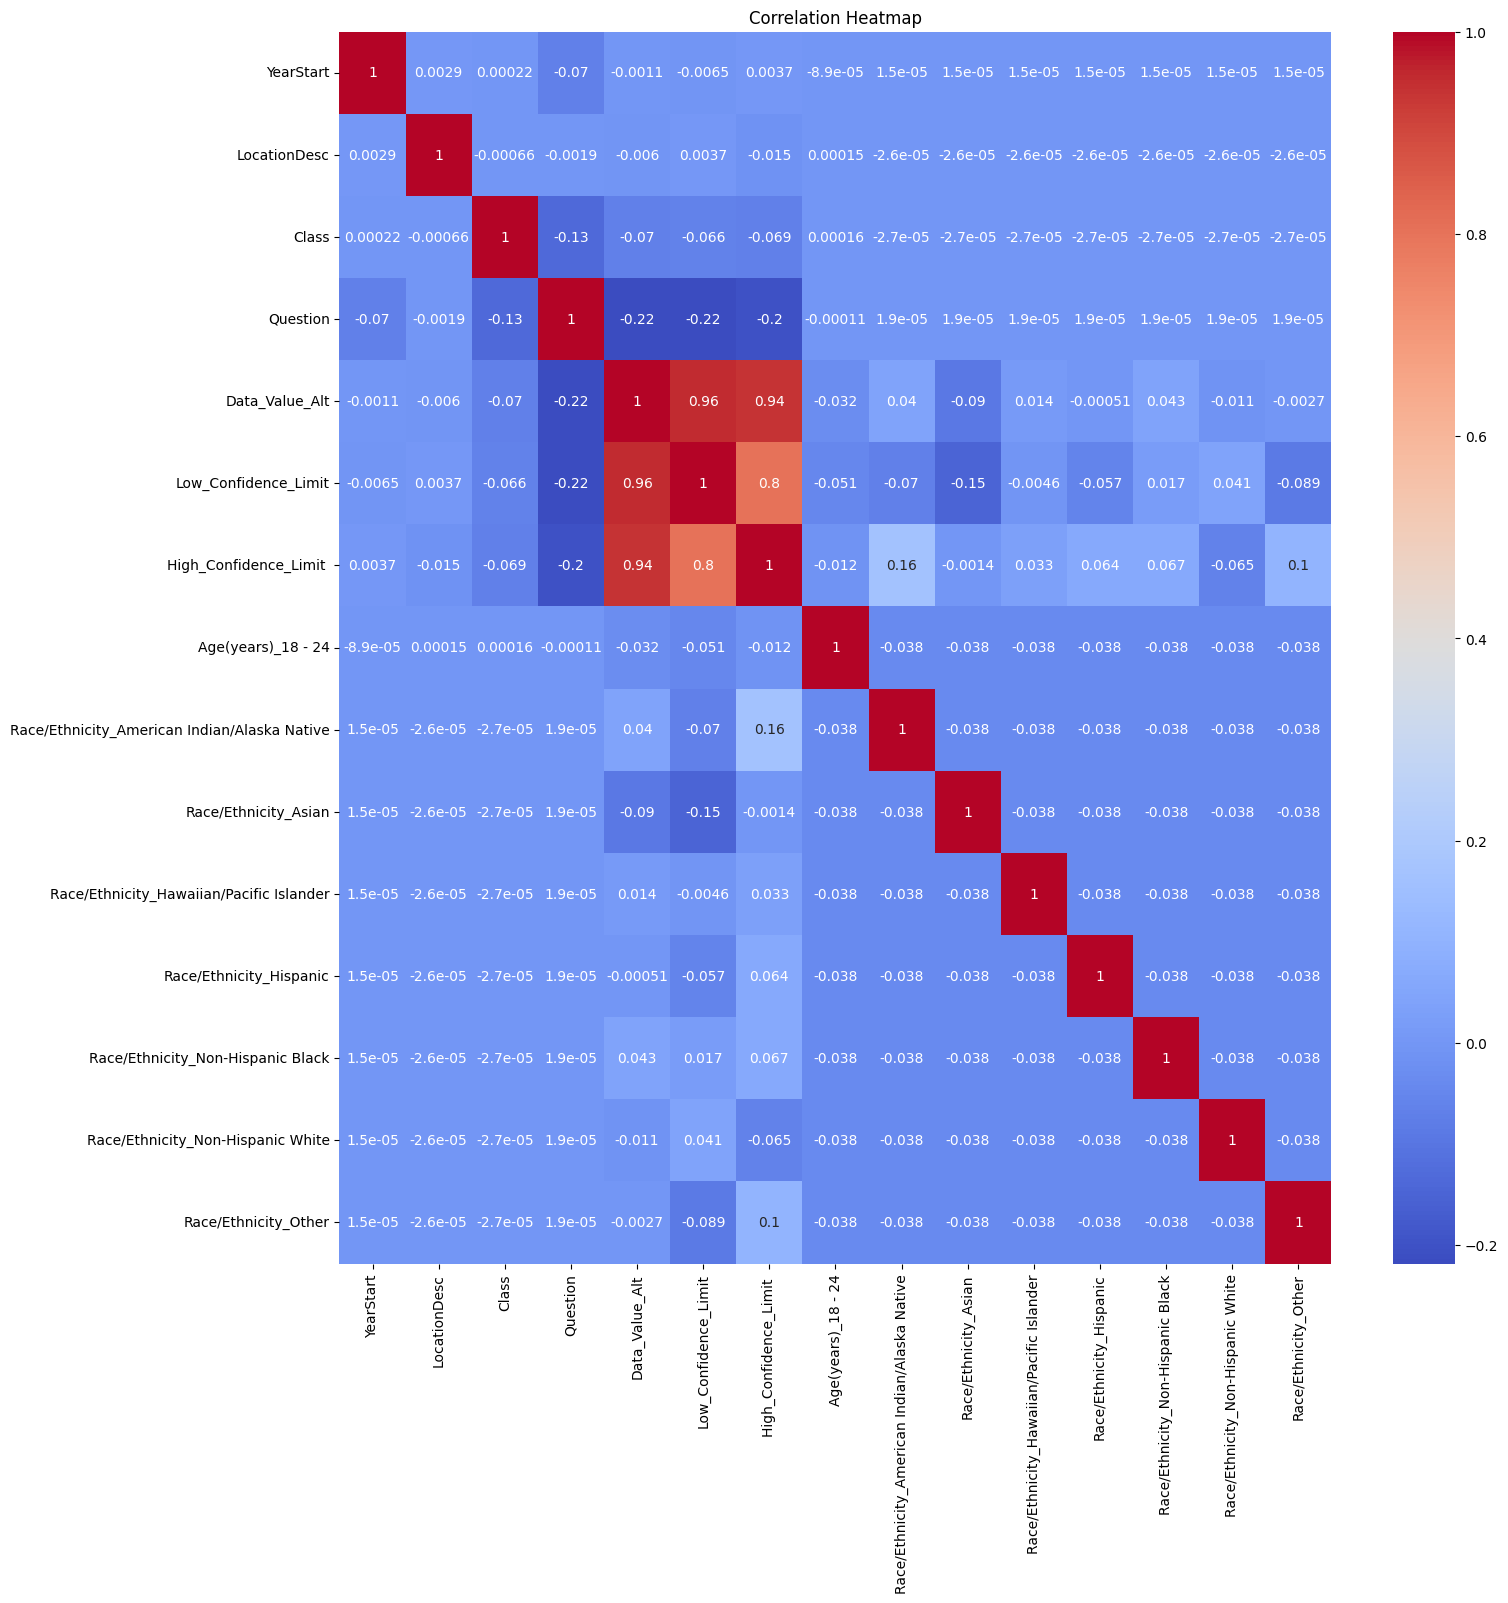

In [36]:
# Correlation heatmap of different values of race/ethnicity and 'YearStart', 'LocationDesc', 'Class' , 'Question', 'Data_Value_Alt'
# We can observe that race/ethnicity has no significant correlation with Data_Value_Alt
race_data = data.iloc[:,26:34]
race_data = pd.concat([main_d, race_data], axis=1)
race_data = race_data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(race_data, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [37]:
#Removing Outliers if any
#defining z_score_threshold to 3 because most of the data lie in the range of -3std to +3std
z_score_threshold = 3
for col in numeric_data.columns[0:]:
  #Calculating z_score for each column
  z_score = zscore(data[col])
  #Finding outliers that is: the data point below or above -3std and +3std respectively
  outliers = (z_score > z_score_threshold) | (z_score < -z_score_threshold)
  #Creating a outlier free dataset
  data = data[~outliers]

In [38]:
data.shape

(51485, 33)

In [39]:
# Checking number of missing values
data.isnull().sum()

YearStart                                          0
LocationDesc                                       0
Class                                              0
Question                                           0
Data_Value_Alt                                  5046
Low_Confidence_Limit                            5046
High_Confidence_Limit                           5046
Age(years)_18 - 24                                 0
Age(years)_25 - 34                                 0
Age(years)_35 - 44                                 0
Age(years)_45 - 54                                 0
Age(years)_55 - 64                                 0
Age(years)_65 or older                             0
Education_College graduate                         0
Education_High school graduate                     0
Education_Less than high school                    0
Education_Some college or technical school         0
Gender_Female                                      0
Gender_Male                                   

In [40]:
# Checking percentage of missing values
data.isnull().sum() * 100 / len(data)

YearStart                                       0.000000
LocationDesc                                    0.000000
Class                                           0.000000
Question                                        0.000000
Data_Value_Alt                                  9.800913
Low_Confidence_Limit                            9.800913
High_Confidence_Limit                           9.800913
Age(years)_18 - 24                              0.000000
Age(years)_25 - 34                              0.000000
Age(years)_35 - 44                              0.000000
Age(years)_45 - 54                              0.000000
Age(years)_55 - 64                              0.000000
Age(years)_65 or older                          0.000000
Education_College graduate                      0.000000
Education_High school graduate                  0.000000
Education_Less than high school                 0.000000
Education_Some college or technical school      0.000000
Gender_Female                  

In [41]:
# Calculating Mean, Mode and Median for feature Data_Value_Alt and we can see that it has almost same mean and median.
# But mean > median > mode
# This means that the distribution is bit positvely skewed.
# So we can replace the missing values with median for this feature.
print("Mean", data['Data_Value_Alt'].mean())
print("Median", data['Data_Value_Alt'].median())
print("Mode", data['Data_Value_Alt'].mode())

Mean 31.195490858976296
Median 30.8
Mode 0    29.6
Name: Data_Value_Alt, dtype: float64


In [42]:
# Replacing the missing values with the median
data['Data_Value_Alt'].fillna(data['Data_Value_Alt'].median(), inplace=True)  

In [43]:
# Calculating Mean, Mode and Median for feature Low_Confidence_Limit and we can see that it has almost same mean, mode and median values.
# But here mode > mean
# This means that the distribution is bit negatively skewed.
# So we can replace the missing values with median for this feature.
print("Mean", data['Low_Confidence_Limit'].mean())
print("Median", data['Low_Confidence_Limit'].median())
print("Mode", data['Low_Confidence_Limit'].mode())

Mean 26.926314089450678
Median 26.5
Mode 0    27.6
Name: Low_Confidence_Limit, dtype: float64


In [44]:
# Replacing the missing values with the median
data['Low_Confidence_Limit'].fillna(data['Low_Confidence_Limit'].median(), inplace=True)  

In [45]:
# Calculating Mean, Mode and Median for feature High_Confidence_Limit and we can see that it has almost same mean and median values.
# But here mode > mean but it is bimodal
# This means that the distribution is bit negatively skewed.
# We can replace the missing values with median for this feature.
print("Mean", data['High_Confidence_Limit '].mean())
print("Median", data['High_Confidence_Limit '].median())
print("Mode", data['High_Confidence_Limit '].mode())

Mean 36.04031525226641
Median 35.6
Mode 0    37.1
1    37.8
2    37.9
Name: High_Confidence_Limit , dtype: float64


In [46]:
# Replacing the missing values with the median
data['High_Confidence_Limit '].fillna(data['High_Confidence_Limit '].median(), inplace=True)  

In [47]:
# Now there are not missing values present
data.isnull().sum() * 100 / len(data)

YearStart                                       0.0
LocationDesc                                    0.0
Class                                           0.0
Question                                        0.0
Data_Value_Alt                                  0.0
Low_Confidence_Limit                            0.0
High_Confidence_Limit                           0.0
Age(years)_18 - 24                              0.0
Age(years)_25 - 34                              0.0
Age(years)_35 - 44                              0.0
Age(years)_45 - 54                              0.0
Age(years)_55 - 64                              0.0
Age(years)_65 or older                          0.0
Education_College graduate                      0.0
Education_High school graduate                  0.0
Education_Less than high school                 0.0
Education_Some college or technical school      0.0
Gender_Female                                   0.0
Gender_Male                                     0.0
Income_$15,0

In [48]:
# After data pre-processing
age_cor = data.iloc[:, :13]
cor_age = age_cor.corr()
cor_ed = data.iloc[:,:17]
cor_ed.drop(columns=['Age(years)_18 - 24','Age(years)_25 - 34','Age(years)_35 - 44','Age(years)_45 - 54','Age(years)_55 - 64','Age(years)_65 or older'], inplace=True)
ed_cor = cor_ed.corr()

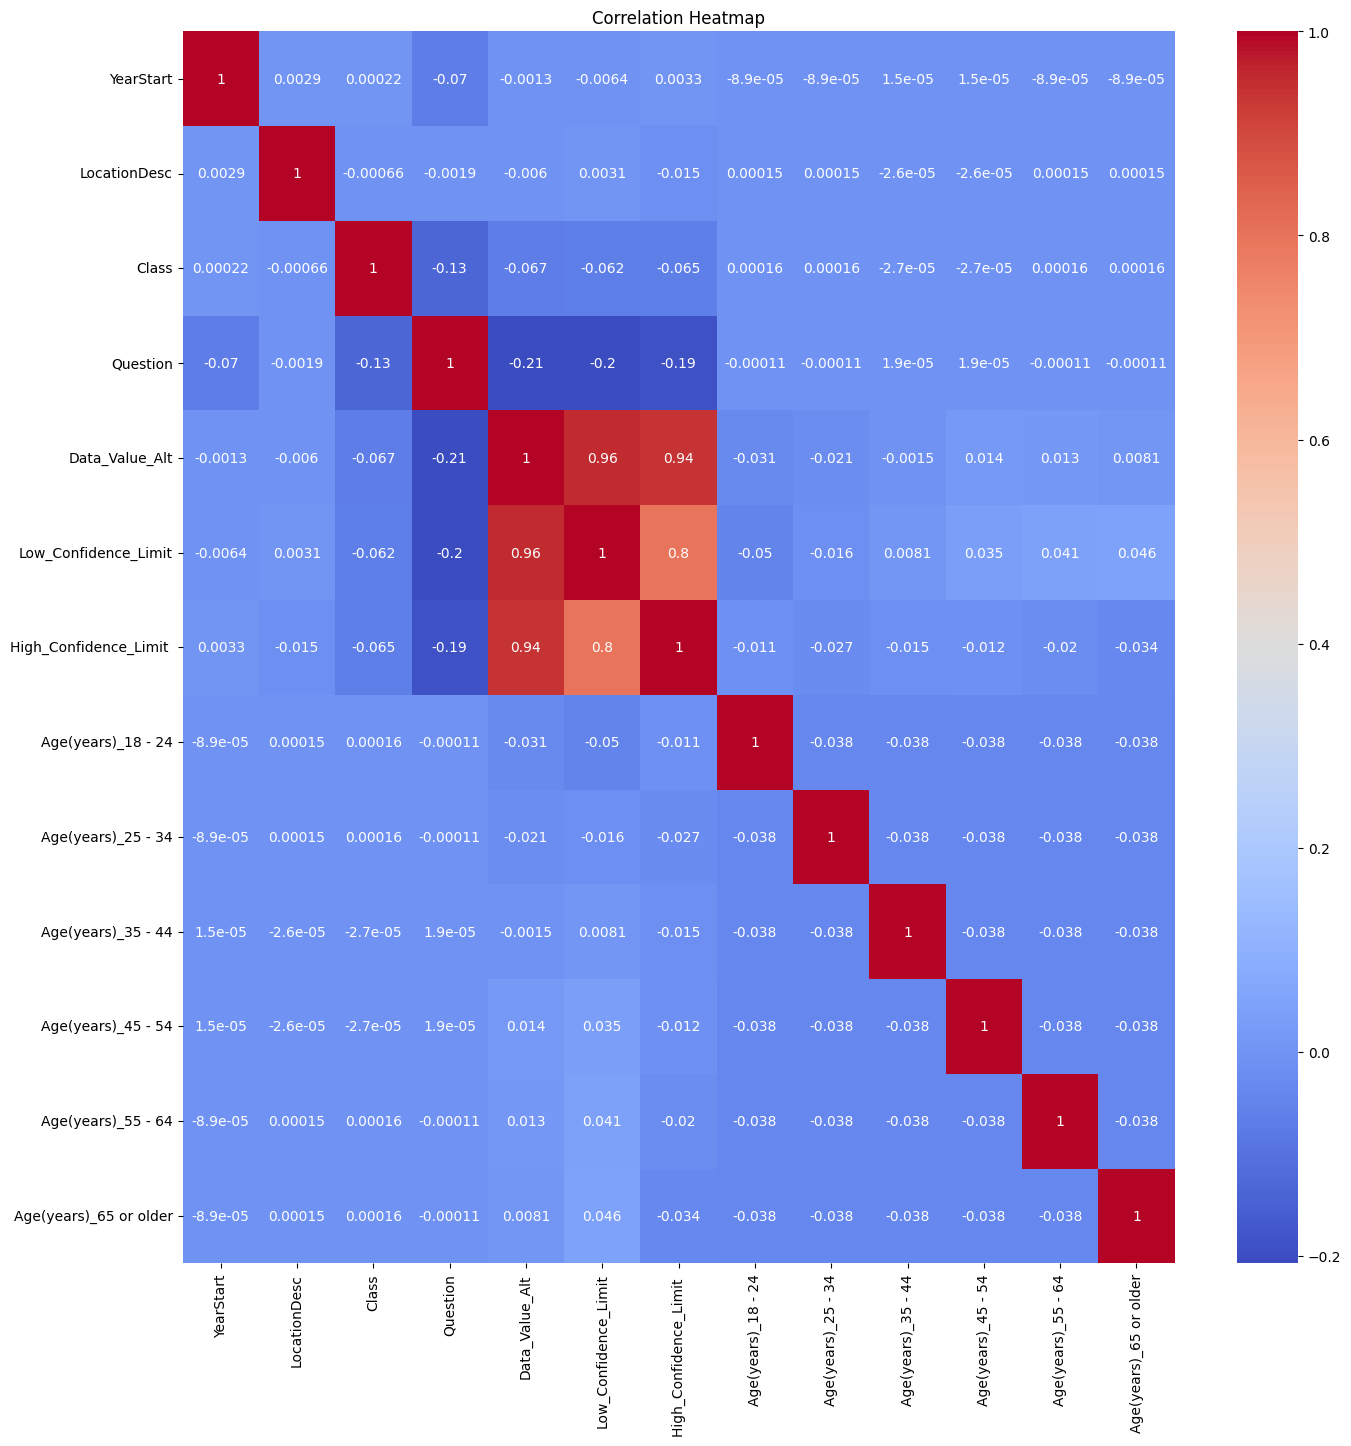

In [49]:
# Correlation heatmap between 'YearStart', 'LocationDesc', 'Class' , 'Question', 'Data_Value_Alt', 
# 'Age(years)_18 - 24','Age(years)_25 - 34','Age(years)_35 - 44','Age(years)_45 - 54','Age(years)_55 - 64','Age(years)_65 or older'
# We can observe that age has no significant correlation with Data_Value_Alt
plt.figure(figsize=(16, 16))
sns.heatmap(cor_age, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

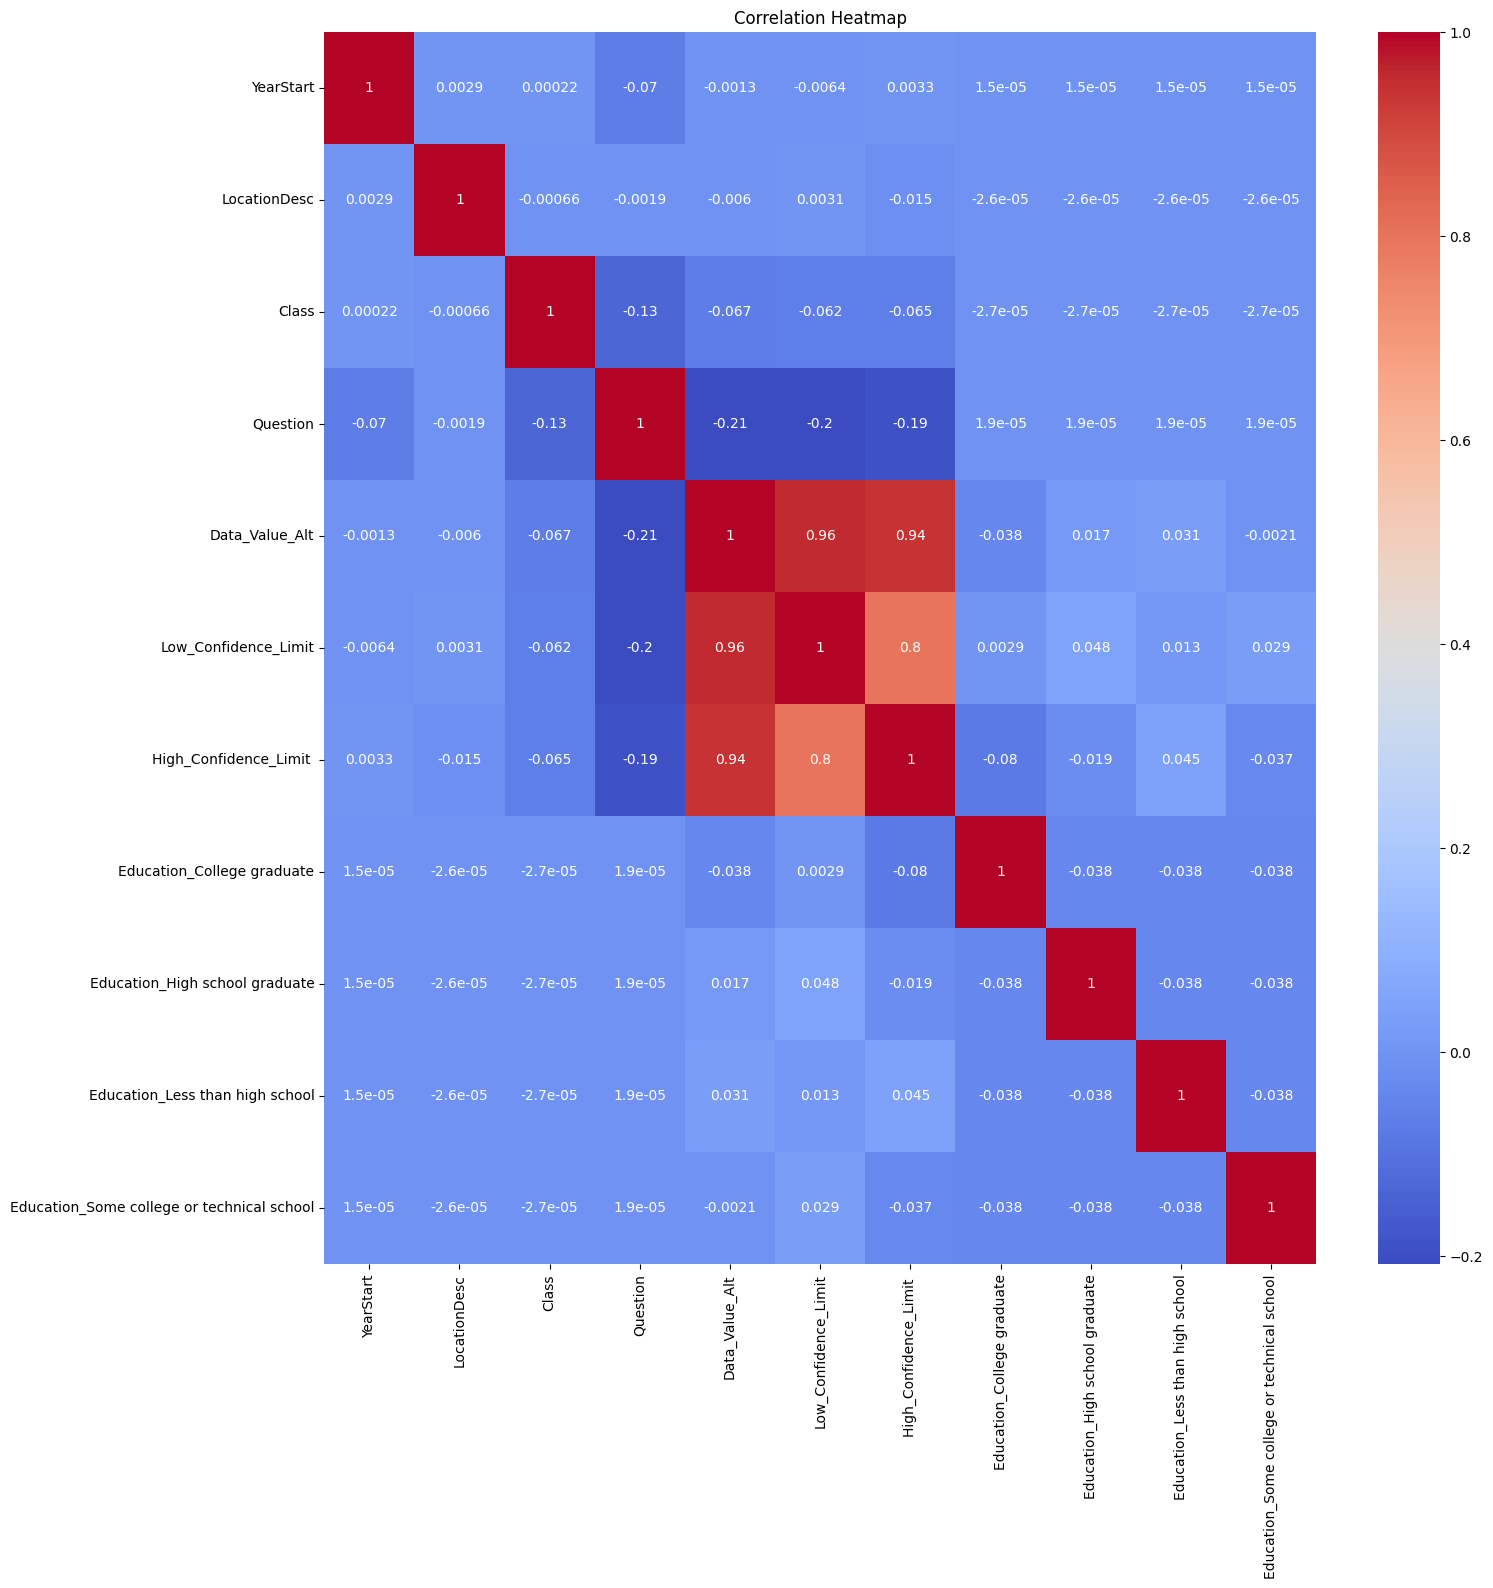

In [50]:
# Correlation heatmap of different values of education and 'YearStart', 'LocationDesc', 'Class' , 'Question', 'Data_Value_Alt'
# We can observe that education has no significant correlation with Data_Value_Alt
plt.figure(figsize=(16, 16))
sns.heatmap(ed_cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

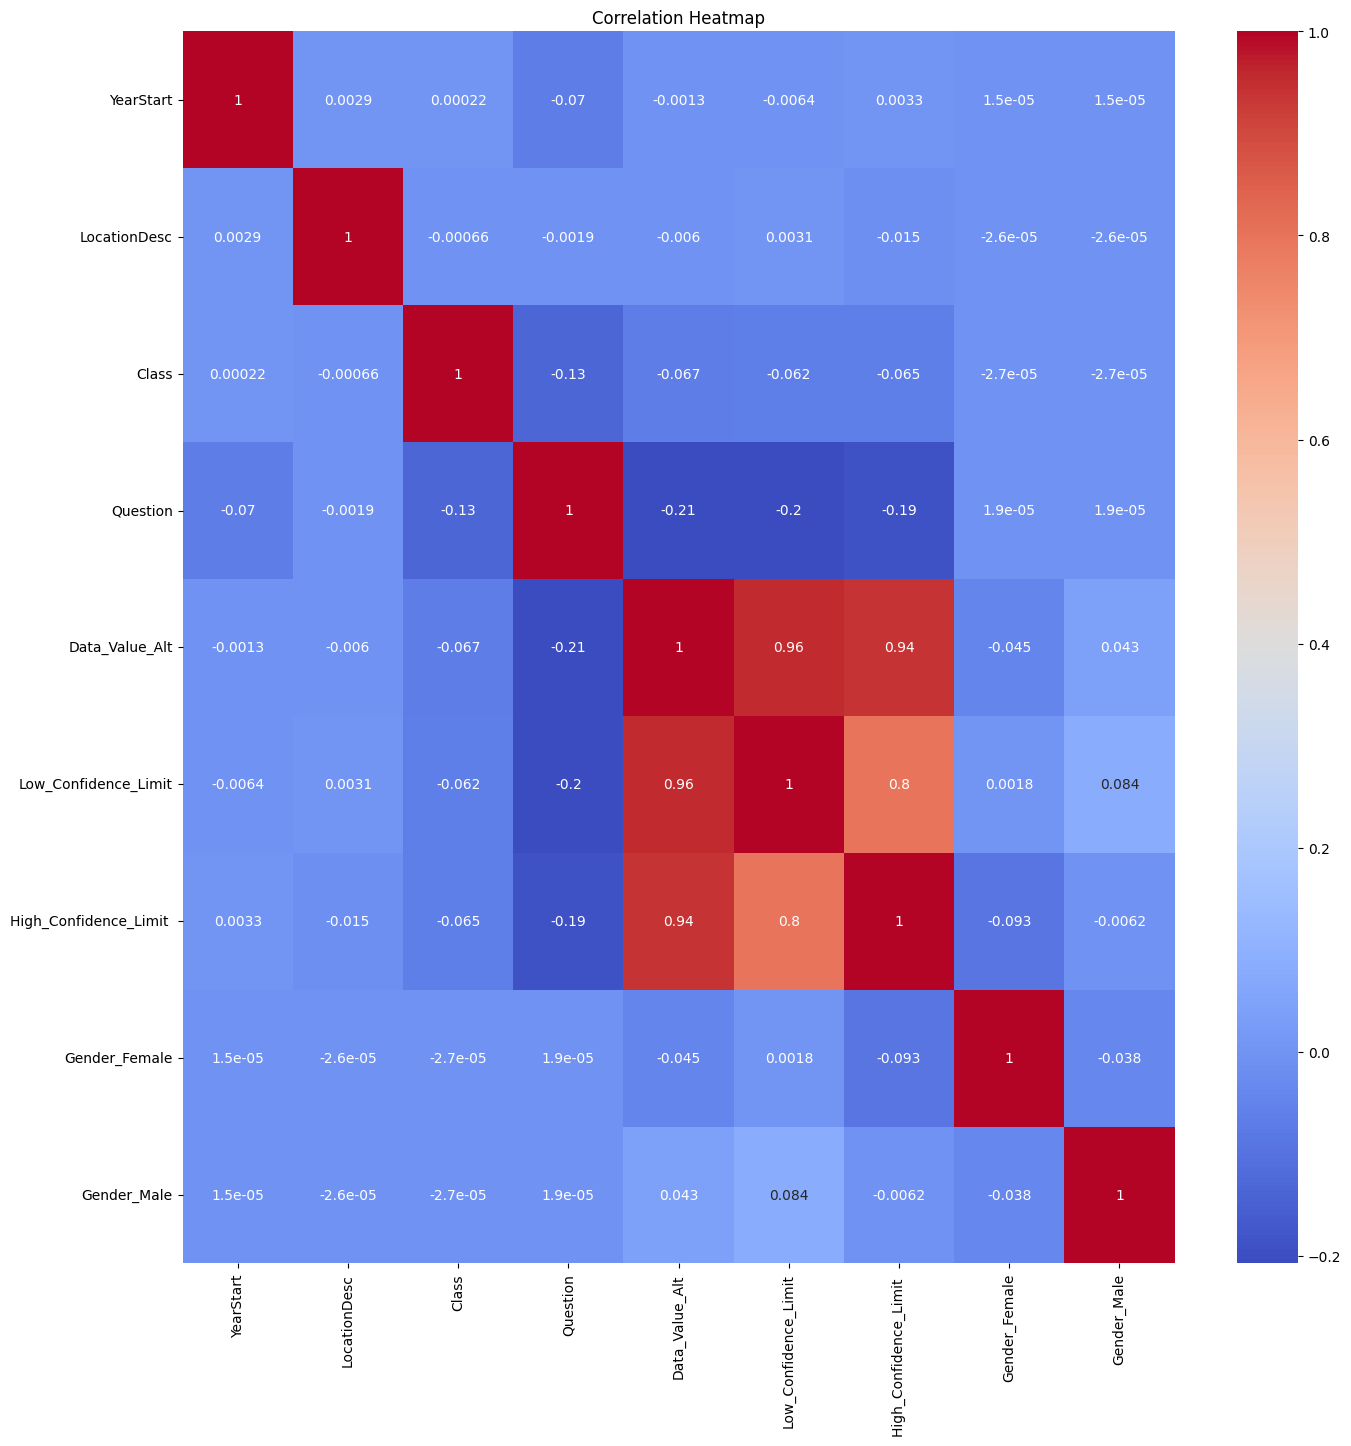

In [51]:
# Correlation heatmap of different values of Gender and 'YearStart', 'LocationDesc', 'Class' , 'Question', 'Data_Value_Alt'
# We can observe that gender has no significant correlation with Data_Value_Alt
main_d = data.iloc[:,:7]
gender_data = data.iloc[:,17:19]
gender_data = pd.concat([main_d, gender_data], axis=1)
gender_cor = gender_data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(gender_cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

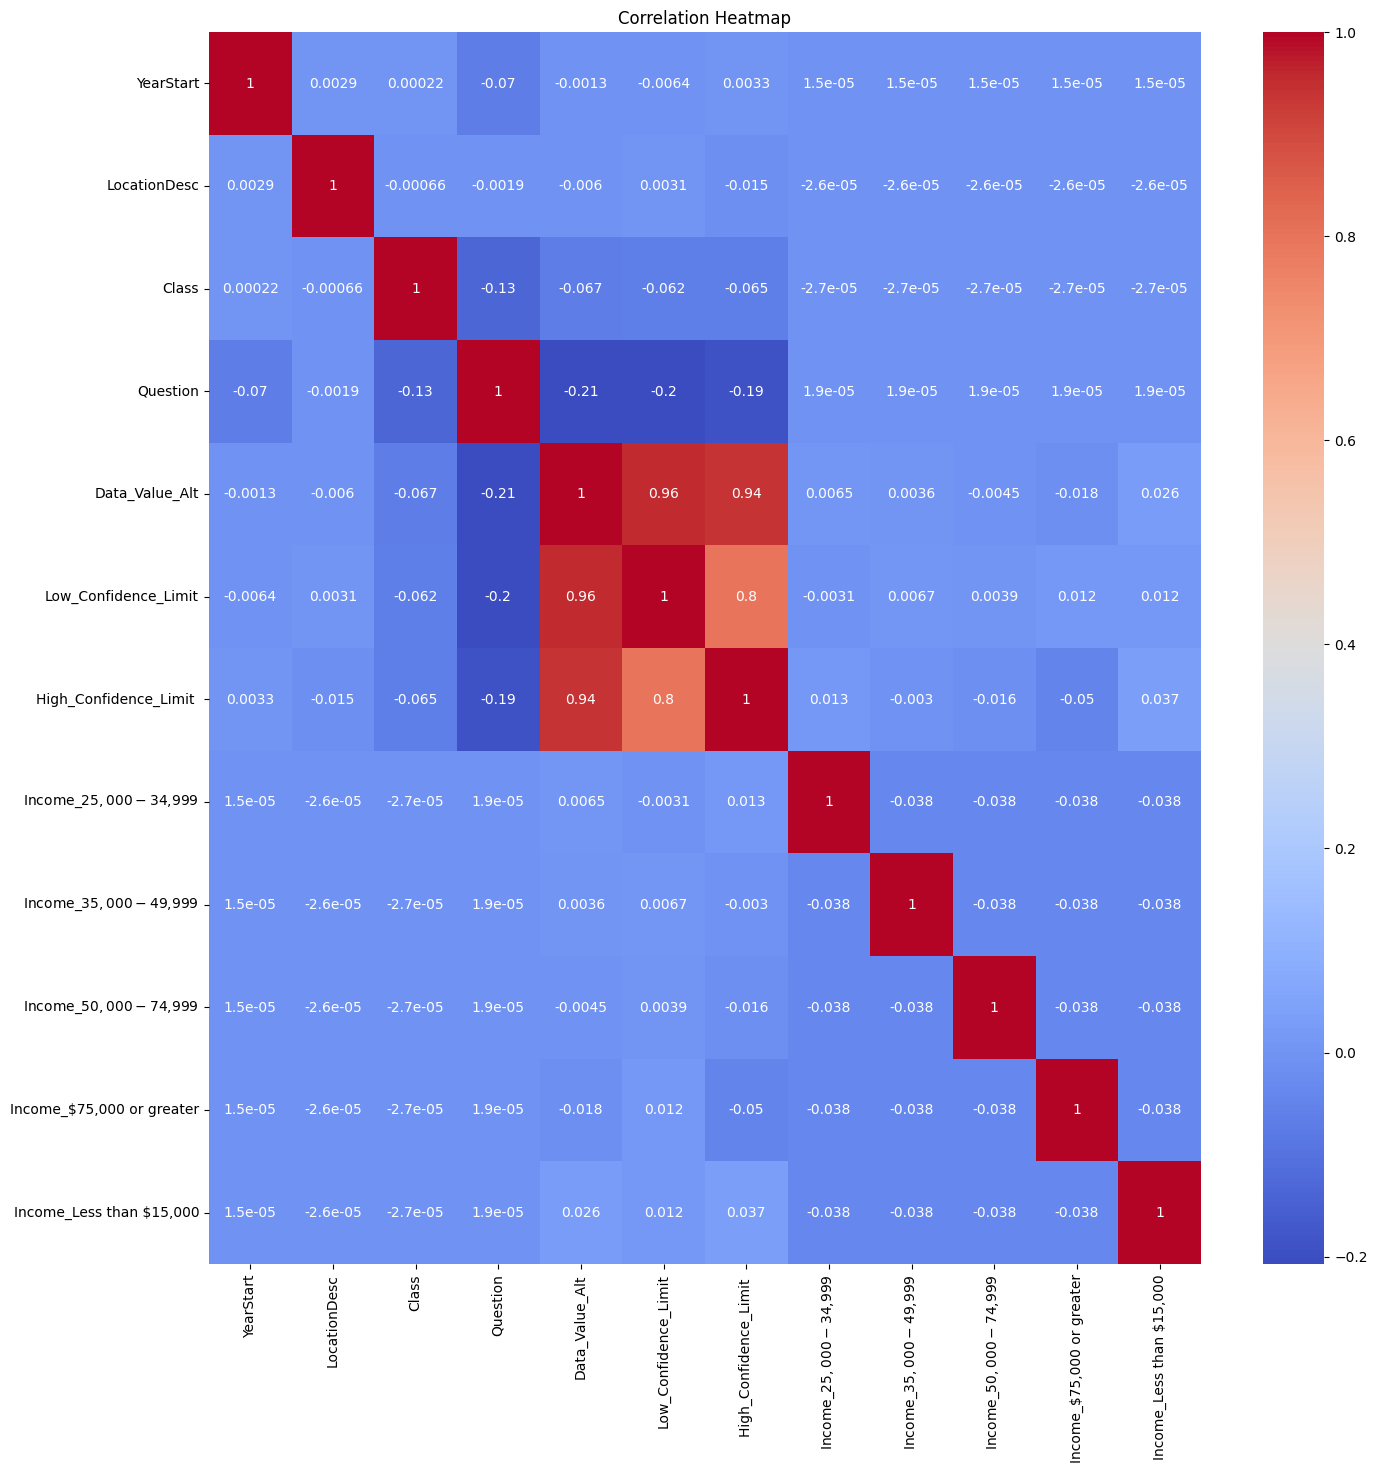

In [52]:
# Correlation heatmap of different values of income and 'YearStart', 'LocationDesc', 'Class' , 'Question', 'Data_Value_Alt'
# We can observe that income has no significant correlation with Data_Value_Alt
income_data = data.iloc[:,20:25]
income_data = pd.concat([main_d, income_data], axis=1)
income_data = income_data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(income_data, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

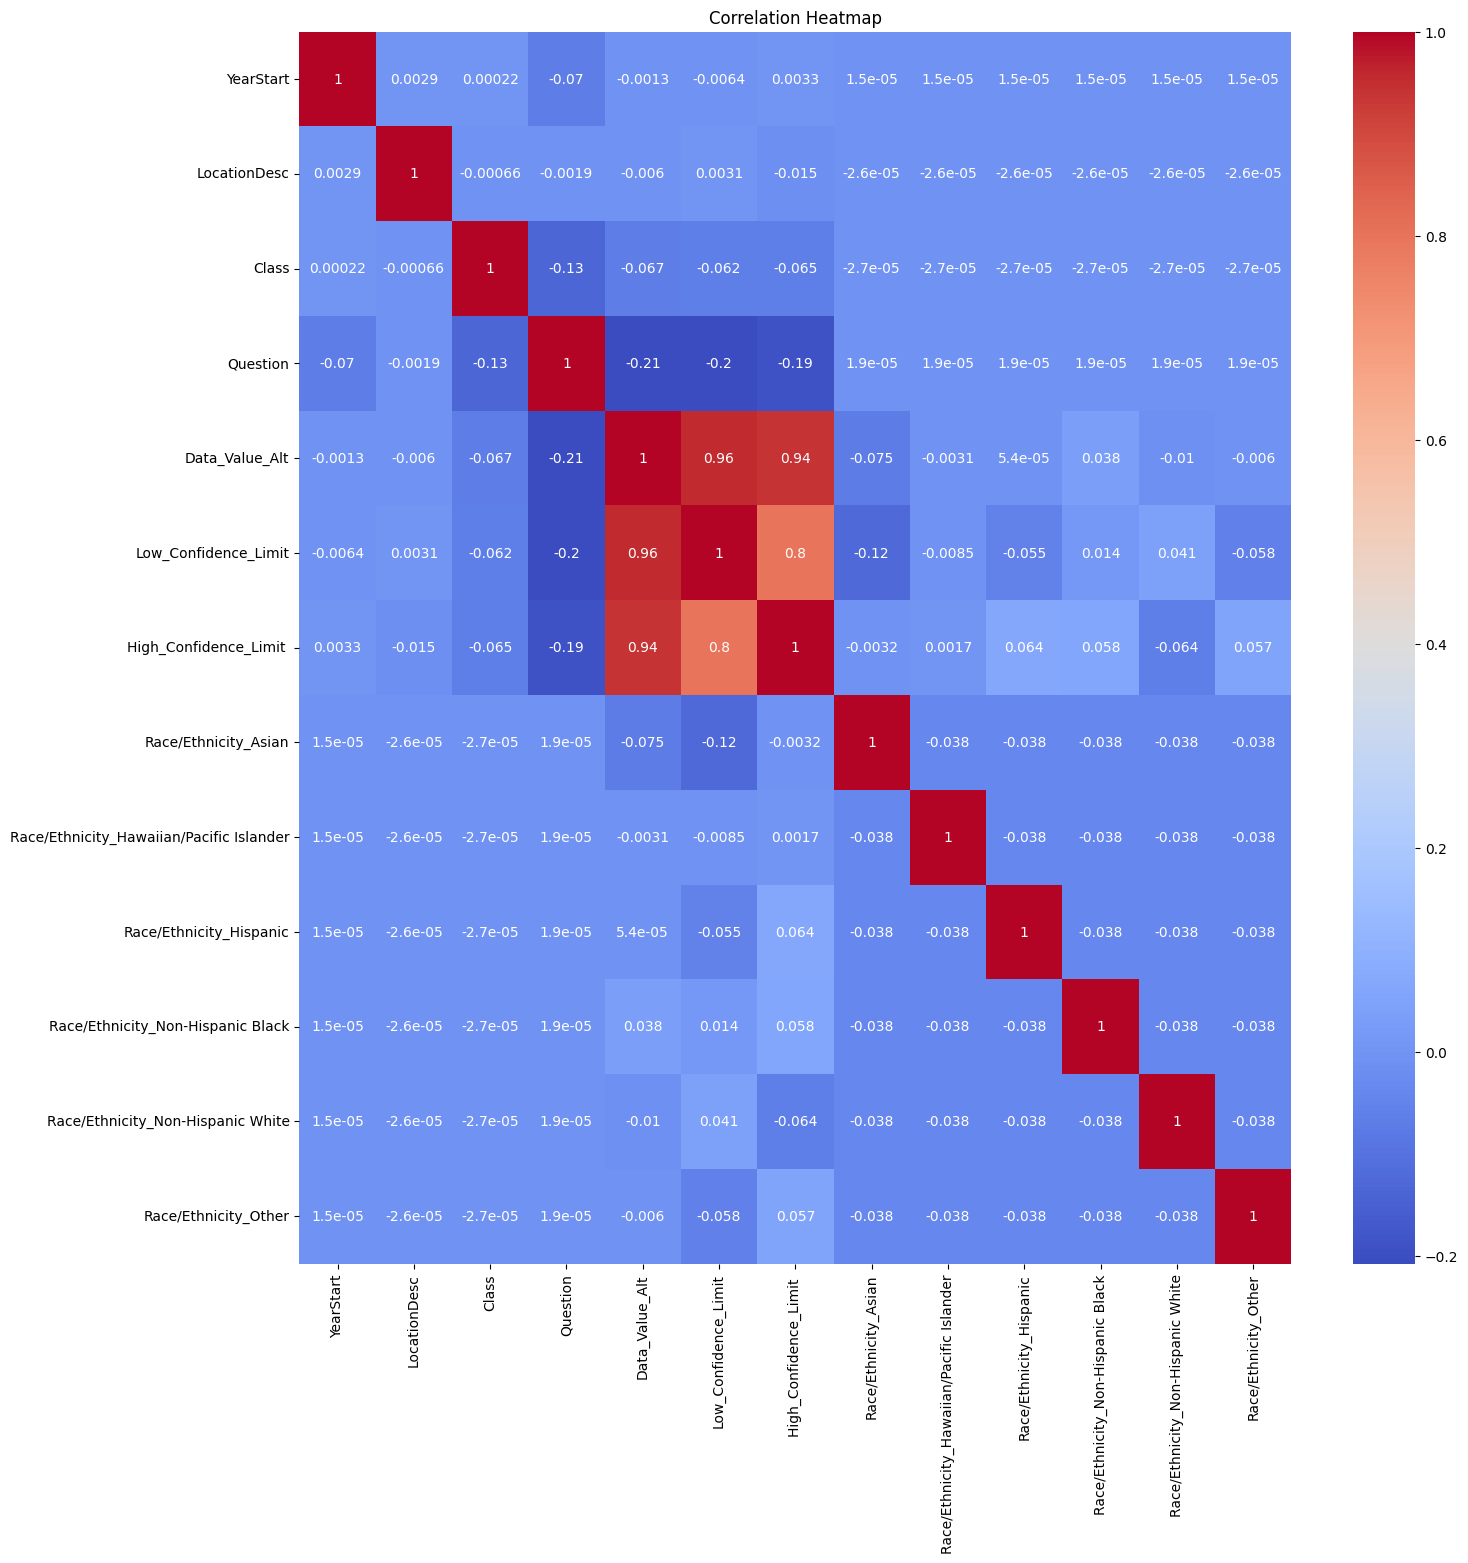

In [53]:
# Correlation heatmap of different values of race/ethnicity and 'YearStart', 'LocationDesc', 'Class' , 'Question', 'Data_Value_Alt'
# We can observe that race/ethnicity has no significant correlation with Data_Value_Alt
race_data = data.iloc[:,27:]
race_data = pd.concat([main_d, race_data], axis=1)
race_data = race_data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(race_data, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [54]:
# Training starts
# Training our model for three highly correlated features
# Splitting the data for train and test
# Here I have taken Data_Value_Alt feature as target, because I want to predict the percentage of surety that a value will lie in the given interval
X = data[['Question','Low_Confidence_Limit','High_Confidence_Limit ']]
Y = data['Data_Value_Alt']
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.30)
# Define a range of degrees for hyperparameter tunning
degrees = [1,2, 3, 4, 5]
# Creating dictionaries to store rmse and r2 score
rmse_values = {}
r2_values = {}
# Iterating over different degrees
for degree in degrees:
    # defining the degree for model
    poly = PolynomialFeatures(degree=degree)
    #Normalizing the data
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    # Training our Polynomial Regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    # Predictions
    y_pred_poly = poly_model.predict(X_test_poly)
    # Calculating rmse and r2 score
    mse = mean_squared_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_poly)
    # Storing rmse and r2 in dictionaries 
    rmse_values[degree] = rmse
    r2_values[degree] = r2
print("RMSE Values:")
for degree, rmse in rmse_values.items():
    print(f"Degree {degree}: {rmse}")
print("\nR² Values:")
for degree, r2 in r2_values.items():
    print(f"Degree {degree}: {r2}")

RMSE Values:
Degree 1: 0.33734982304065403
Degree 2: 0.14056500001201927
Degree 3: 0.08012880999043559
Degree 4: 0.055029507669814376
Degree 5: 0.043752203082452465

R² Values:
Degree 1: 0.9988174004669327
Degree 2: 0.9997946800623176
Degree 3: 0.9999332802952451
Degree 4: 0.999968532083832
Degree 5: 0.9999801080855737


In [55]:
# Training our model for three highly correlated features and with every age value(categorical and considered as feature) to see the effect of these features.
# We observed that there is no significant effect of these features.
#Splitting the data for train and test
#Here I have taken Data_Value_Alt feature as target, because I want to predict the percentage of surety that a value will lie in the given interval
X = data[['Question','Low_Confidence_Limit','High_Confidence_Limit ','Age(years)_18 - 24',
          'Age(years)_25 - 34','Age(years)_35 - 44','Age(years)_45 - 54','Age(years)_55 - 64','Age(years)_65 or older']]
Y = data['Data_Value_Alt']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.30)
# Define a range of degrees for hyperparameter tunning
degrees = [1,2, 3, 4, 5]
# Creating dictionaries to store rmse and r2 score
rmse_values = {}
r2_values = {}
# Iterating over different degrees
for degree in degrees:
    # defining the degree for model
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Training our Polynomial Regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Predictions
    y_pred_poly = poly_model.predict(X_test_poly)

    # Calculating rmse and r2 score
    mse = mean_squared_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_poly)
    # Storing rmse and r2 in dictionaries
    rmse_values[degree] = rmse
    r2_values[degree] = r2
print("RMSE Values:")
for degree, rmse in rmse_values.items():
    print(f"Degree {degree}: {rmse}")

print("\nR² Values:")
for degree, r2 in r2_values.items():
    print(f"Degree {degree}: {r2}")

RMSE Values:
Degree 1: 0.33606421795044683
Degree 2: 0.13641722390514446
Degree 3: 0.07849524194011767
Degree 4: 0.05372242463031927
Degree 5: 0.04329674122386086

R² Values:
Degree 1: 0.9988263968197777
Degree 2: 0.9998066184020429
Degree 3: 0.9999359729644285
Degree 4: 0.9999700092076172
Degree 5: 0.9999805200808648


In [56]:
# Training our model for three highly correlated features and with every education value(categorical and considered as feature) to see the effect of these features.
# We observed that there is no significant effect of these features.
#Splitting the data for train and test
#Here I have taken Data_Value_Alt feature as target, because I want to predict the percentage of surety that a value will lie in the given interval
X = data[['Question','Low_Confidence_Limit','High_Confidence_Limit ','Education_College graduate',
          'Education_High school graduate','Education_Less than high school','Education_Some college or technical school']]
Y = data['Data_Value_Alt']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.30)
# Define a range of degrees for hyperparameter tunning
degrees = [1,2, 3, 4, 5]
# Creating dictionaries to store rmse and r2 score
rmse_values = {}
r2_values = {}
# Iterating over different degrees
for degree in degrees:
    # defining the degree for model
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    # Training our Polynomial Regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    # Predictions
    y_pred_poly = poly_model.predict(X_test_poly)
    # Calculating rmse and r2 score
    mse = mean_squared_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_poly)
    # Storing rmse and r2 in dictionaries
    rmse_values[degree] = rmse
    r2_values[degree] = r2
print("RMSE Values:")
for degree, rmse in rmse_values.items():
    print(f"Degree {degree}: {rmse}")
print("\nR² Values:")
for degree, r2 in r2_values.items():
    print(f"Degree {degree}: {r2}")

RMSE Values:
Degree 1: 0.33672846297174097
Degree 2: 0.13915480079740086
Degree 3: 0.07929386851826895
Degree 4: 0.05417534042326413
Degree 5: 0.043318928111794296

R² Values:
Degree 1: 0.9988217528830279
Degree 2: 0.9997987790858218
Degree 3: 0.9999346634885072
Degree 4: 0.9999695013913096
Degree 5: 0.9999805001112547


In [57]:
# Training our model for three highly correlated features and with every Gender value(categorical and considered as feature) to see the effect of these features.
# We observed that there is no significant effect of these features.
#Splitting the data for train and test
#Here I have taken Data_Value_Alt feature as target, because I want to predict the percentage of surety that a value will lie in the given interval
X = data[['Question','Low_Confidence_Limit','High_Confidence_Limit ','Gender_Female','Gender_Male']]
Y = data['Data_Value_Alt']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.30)
# Define a range of degrees for hyperparameter tunning
degrees = [1,2, 3, 4, 5]
# Creating dictionaries to store rmse and r2 score
rmse_values = {}
r2_values = {}
# Iterating over different degrees
for degree in degrees:
    # defining the degree for model
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    # Training our Polynomial Regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    # Predictions
    y_pred_poly = poly_model.predict(X_test_poly)
    # Calculating rmse and r2 score
    mse = mean_squared_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_poly)
    # Storing rmse and r2 in dictionaries
    rmse_values[degree] = rmse
    r2_values[degree] = r2
print("RMSE Values:")
for degree, rmse in rmse_values.items():
    print(f"Degree {degree}: {rmse}")
print("\nR² Values:")
for degree, r2 in r2_values.items():
    print(f"Degree {degree}: {r2}")

RMSE Values:
Degree 1: 0.33662880845308446
Degree 2: 0.13961541856396997
Degree 3: 0.07997288255470099
Degree 4: 0.05482760668536774
Degree 5: 0.04373193451611556

R² Values:
Degree 1: 0.9988224501824093
Degree 2: 0.9997974447541584
Degree 3: 0.9999335397103081
Degree 4: 0.9999687625691964
Degree 5: 0.9999801265114892


In [58]:
# Training our model for three highly correlated features and with every Income value(categorical and considered as feature) to see the effect of these features.
# We observed that there is no significant effect of these features.
#Splitting the data for train and test
#Here I have taken Data_Value_Alt feature as target, because I want to predict the percentage of surety that a value will lie in the given interval
X = data[['Question','Low_Confidence_Limit','High_Confidence_Limit ','Income_$15,000 - $24,999','Income_$25,000 - $34,999','Income_$35,000 - $49,999',
          'Income_$50,000 - $74,999','Income_$75,000 or greater','Income_Less than $15,000']]
Y = data['Data_Value_Alt']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.30)
# Define a range of degrees for hyperparameter tunning
degrees = [1,2, 3, 4, 5]
# Creating dictionaries to store rmse and r2 score
rmse_values = {}
r2_values = {}
# Iterating over different degrees
for degree in degrees:
    # defining the degree for model
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    # Training our Polynomial Regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    # Predictions
    y_pred_poly = poly_model.predict(X_test_poly)
    # Calculating rmse and r2 score
    mse = mean_squared_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_poly)
    # Storing rmse and r2 in dictionaries
    rmse_values[degree] = rmse
    r2_values[degree] = r2
print("RMSE Values:")
for degree, rmse in rmse_values.items():
    print(f"Degree {degree}: {rmse}")
print("\nR² Values:")
for degree, r2 in r2_values.items():
    print(f"Degree {degree}: {r2}")

RMSE Values:
Degree 1: 0.33540638434482906
Degree 2: 0.13671035396919728
Degree 3: 0.07924092747387189
Degree 4: 0.054213054703089
Degree 5: 0.043272549387882574

R² Values:
Degree 1: 0.9988309868948554
Degree 2: 0.9998057864416601
Degree 3: 0.9999347507040389
Degree 4: 0.999969458913185
Degree 5: 0.9999805418433966


In [59]:
# Training our model for three highly correlated features and with every Income value(categorical and considered as feature) to see the effect of these features.
# We observed that there is no significant effect of these features.
#Splitting the data for train and test
#Here I have taken Data_Value_Alt feature as target, because I want to predict the percentage of surety that a value will lie in the given interval
X = data[['Question','Low_Confidence_Limit','High_Confidence_Limit ','Race/Ethnicity_2 or more races','Race/Ethnicity_American Indian/Alaska Native',
          'Race/Ethnicity_Asian','Race/Ethnicity_Hawaiian/Pacific Islander','Race/Ethnicity_Hispanic','Race/Ethnicity_Non-Hispanic Black',
         'Race/Ethnicity_Non-Hispanic White','Race/Ethnicity_Other']]
Y = data['Data_Value_Alt']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.30)
# Define a range of degrees for hyperparameter tunning
degrees = [1,2, 3, 4, 5]
# Creating dictionaries to store rmse and r2 score
rmse_values = {}
r2_values = {}
# Iterating over different degrees
for degree in degrees:
    # defining the degree for model
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    # Training our Polynomial Regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    # Predictions
    y_pred_poly = poly_model.predict(X_test_poly)
    # Calculating rmse and r2 score
    mse = mean_squared_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_poly)
    # Storing rmse and r2 in dictionaries
    rmse_values[degree] = rmse
    r2_values[degree] = r2
print("RMSE Values:")
for degree, rmse in rmse_values.items():
    print(f"Degree {degree}: {rmse}")

print("\nR² Values:")
for degree, r2 in r2_values.items():
    print(f"Degree {degree}: {r2}")

RMSE Values:
Degree 1: 0.33309452438689785
Degree 2: 0.13088045049892705
Degree 3: 0.07235695114366442
Degree 4: 0.049780817279802055
Degree 5: 0.04068460034731251

R² Values:
Degree 1: 0.998847046699375
Degree 2: 0.9998219974219938
Degree 3: 0.9999455951962773
Degree 4: 0.9999742486041657
Degree 5: 0.9999827996676635


In [60]:
# Obervations:
# I have taken Data_Value_Alt feature as target, because I want to predict the percentage of surety that a value will lie in the given interval

# The highly correlated features are "Question", "Low Confidence", "High Confidence" and we are comparing rest of models trained with more features
# with the model trained with these three features and we call it "base_model"

# ----------------------------------------------------------Obervation for feature Age----------------------------------------------------------
# We call it age_model
# The overall observation from this experiment is that different age groups are not significantly correlated with our Target variable "Data_Value".
# After training the model considering different age groups there was very slight change in model accuracy we can say it negligible.
# Because value of rmse for degree 5 for basel model is 0.043752203082452465 and for age_model is 0.04329674122386086

# ----------------------------------------------------------Obervation for feature Education----------------------------------------------------------
# We call it ed_model
# The overall observation from this experiment is that different education groups are not significantly correlated with our Target variable "Data_Value".
# After training the model considering different education groups there was very slight change in model accuracy we can say it negligible.
# Because value of rmse for degree 5 for basel model is 0.043752203082452465 and for ed_model is 0.043318928111794296

# ----------------------------------------------------------Obervation for feature Income----------------------------------------------------------
# We call it in_model
# The overall observation from this experiment is that different income groups are not significantly correlated with our Target variable "Data_Value".
# After training the model considering different income groups there was very slight change in model accuracy we can say it negligible.
# Because value of rmse for degree 5 for basel model is 0.043752203082452465 and for in_model is 0.043272549387882574

# ----------------------------------------------------------Obervation for feature Gender----------------------------------------------------------
# We call it gen_model
# The overall observation from this experiment is that different gender groups are not significantly correlated with our Target variable "Data_Value".
# After training the model considering different gender groups there was very slight change in model accuracy we can say it negligible.
# Because value of rmse for degree 5 for basel model is 0.043752203082452465 and for gen_model is 0.04373193451611556

# ----------------------------------------------------------Obervation for feature Race/Ethnicity----------------------------------------------------------
# We call it race_model
# The overall observation from this experiment is that different race/ethnicity groups are not significantly correlated with our Target variable "Data_Value".
# After training the model considering different race/ethnicity groups there was very slight change in model accuracy we can say it negligible.
# Because value of rmse for degree 5 for basel model is 0.043752203082452465 and for race_model is 0.061245325222929275

# ----------------------------------------------------------------Best features and Model--------------------------------------------------------------
# Best feature in support of base_model is Race/Ethnicity groups with polynomial degree 5 as it has lowest rmse of 0.04068460034731251 and highest 
# r2 score of 0.9999827996676635
# But this not that significant we can just train our model on mentioned highly three correlated features also.